# Global Factors Influencing Tertiary Education Enrollment

## Continued EDA, Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tee = pd.read_csv('wdi_ctry_clean.csv')
tee.shape

(178, 26)

We can see that this dataset contains 178 observations and 26 columns or attributes.

Next, we can view a sample of this dataset. Attributes include country names, access to utilities, birth and fertility rates, literacy rates, and employment information:

In [3]:
# limit float to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [4]:
tee.head().T

0        1  \
Country Name                                        Afghanistan  Albania   
Access to clean fuels and technologies for cook...        32.45    81.60   
Access to electricity (% of population)                   97.70   100.00   
Adolescent fertility rate (births per 1,000 wom...        86.80    15.01   
Birth rate, crude (per 1,000 people)                      36.47    10.34   
Employment in agriculture (% of total employmen...        44.51    36.42   
Employment in services (% of total employment) ...        37.15    43.43   
Fertility rate, total (births per woman)                   4.87     1.41   
Individuals using the Internet (% of population)          17.60    68.55   
Life expectancy at birth, total (years)                   63.56    79.28   
Literacy rate, adult total (% of people ages 15...        31.70    98.14   
Mortality rate, infant (per 1,000 live births)            46.30     8.40   
People using at least basic drinking water serv...        73.78    94.76   
People using at least basic sanitation services...        51.00    99.18   
Probability of dying among adolescents ages 10-...         1.90     1.10   
Probability of dying among adolescents ages 15-...        13.40     1.70   
Probability of dying among children ages 5-9 ye...         2.50     0.90   
Probability of dying among youth ages 20-24 yea...        18.10     2.00   
Rule of Law: Estimate                                     -1.73    -0.40   
School enrollment, preprimary (% gross)                    3.08    75.75   
School enrollment, secondary (% gross)                    55.43    95.09   
School enrollment, tertiary (% gross)                      9.69    59.78   
Urban population (% of total population)                  25.75    61.23   
Urban population growth (annual %)                         3.92     1.07   
Vulnerable employment, total (% of total employ...        81.15    51.20   
Wage and salaried workers, total (% of total em...        16.83    45.73   

                                                          2       3          4  
Country Name                                        Algeria  Angola  Argentina  
Access to clean fuels and technologies for cook...    99.70   49.30      99.90  
Access to electricity (% of population)               99.50   45.63     100.00  
Adolescent fertility rate (births per 1,000 wom...    12.30  141.28      46.15  
Birth rate, crude (per 1,000 people)                  23.30   39.73      14.78  
Employment in agriculture (% of total employmen...     9.94   59.33       7.74  
Employment in services (% of total employment) ...    59.59   33.23      72.10  
Fertility rate, total (births per woman)               2.99    5.44       1.99  
Individuals using the Internet (% of population)      58.98   32.13      79.95  
Life expectancy at birth, total (years)               76.47   62.45      77.28  
Literacy rate, adult total (% of people ages 15...    81.41   68.57      99.00  
Mortality rate, infant (per 1,000 live births)        20.10   50.40       7.60  
People using at least basic drinking water serv...    94.24   56.88      99.75  
People using at least basic sanitation services...    86.14   51.39      95.42  
Probability of dying among adolescents ages 10-...     1.60    6.70       1.00  
Probability of dying among adolescents ages 15-...     2.60   12.80       3.10  
Probability of dying among children ages 5-9 ye...     1.60   10.30       0.80  
Probability of dying among youth ages 20-24 yea...     3.20   18.70       4.60  
Rule of Law: Estimate                                 -0.85   -0.99      -0.41  
School enrollment, preprimary (% gross)               79.07   39.61      77.78  
School enrollment, secondary (% gross)                99.61   50.67     108.23  
School enrollment, tertiary (% gross)                 52.62   10.63      95.45  
Urban population (% of total population)              73.19   66.18      91.99  
Urban population growth (annual %)                     2.61    4.

In [5]:
tee.tail()

Country Name  \
173             Vietnam   
174  West Bank and Gaza   
175         Yemen, Rep.   
176              Zambia   
177            Zimbabwe   

     Access to clean fuels and technologies for cooking (% of population)  \
173                                              93.00                      
174                                             100.00                      
175                                              61.40                      
176                                              11.50                      
177                                              30.20                      

     Access to electricity (% of population)  \
173                                    99.40   
174                                   100.00   
175                                    72.78   
176                                    43.00   
177                                    46.68   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
173                                              34.70               
174                                              45.98               
175                                              57.83               
176                                             122.84               
177                                              97.35               

     Birth rate, crude (per 1,000 people)  \
173                                 15.66   
174                                 29.47   
175                                 31.78   
176                                 35.46   
177                                 31.52   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
173                                              34.98                          
174                                               6.05                          
175                                              30.00                          
176                                              57.37                          
177                                              62.40                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
173                                              36.21                       
174                                              63.59                       
175                                              59.11                       
176                                              33.54                       
177                                              26.41                       

     Fertility rate, total (births per woman)  \
173                                      1.95   
174                                      3.64   
175                                      3.96   
176                                      4.45   
177                                      3.60   

     Individuals using the Internet (% of population)  \
173                                             68.66   
174                                             70.62   
175                                             27.00   
176                                             16.80   
177                                             26.59   

     Life expectancy at birth, total (years)  ...  \
173                                    74.09  ...   
174                                    75.24  ...   
175                                    65.09  ...   
176                                    62.79  ...   
177                                    61.29  ...   

     Probability of dying among children ages 5-9 years (per 1,000)  \
173                                               1.30                
174                                               1.80                
175                                               4.60                
176                                               7.00                
177                                               4.90                

     Probability of dying among youth ages 20-24 years (per 1,00

Looking at an overview of the entire dataset tells us the number of entries, datatypes, and whether there are missing values. In this case, we know there are no missing values since the dataset has been cleaned:

In [6]:
tee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 26 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country Name                                                                     178 non-null    object 
 1   Access to clean fuels and technologies for cooking (% of population)             178 non-null    float64
 2   Access to electricity (% of population)                                          178 non-null    float64
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)                    178 non-null    float64
 4   Birth rate, crude (per 1,000 people)                                             178 non-null    float64
 5   Employment in agriculture (% of total employment) (modeled ILO estimate)         178 non-null    float64
 6   Employment

There is 1 categorical column, country name. We may decide to convert it to numeric based on how valuable this action is to our analysis. The remaining 25 columns are numeric. Our data has already been prepared for analysis, but we can look at descriptive statistics as a reminder of the data's distribution:

In [7]:
tee.describe().T

count  mean   std   min  \
Access to clean fuels and technologies for cook... 178.00 67.44 37.90  0.00   
Access to electricity (% of population)            178.00 83.80 26.01  6.77   
Adolescent fertility rate (births per 1,000 wom... 178.00 47.84 40.65  2.12   
Birth rate, crude (per 1,000 people)               178.00 20.18 10.09  5.90   
Employment in agriculture (% of total employmen... 178.00 24.11 20.98  0.40   
Employment in services (% of total employment) ... 178.00 56.12 17.32 10.49   
Fertility rate, total (births per woman)           178.00  2.69  1.34  0.92   
Individuals using the Internet (% of population)   178.00 58.85 27.84  2.00   
Life expectancy at birth, total (years)            178.00 72.30  7.59 52.91   
Literacy rate, adult total (% of people ages 15... 178.00 85.86 18.10 22.30   
Mortality rate, infant (per 1,000 live births)     178.00 21.41 19.77  1.80   
People using at least basic drinking water serv... 178.00 87.45 16.23 35.68   
People using at least basic sanitation services... 178.00 75.85 28.23  8.65   
Probability of dying among adolescents ages 10-... 178.00  2.62  2.63  0.20   
Probability of dying among adolescents ages 15-... 178.00  4.89  3.94  0.80   
Probability of dying among children ages 5-9 ye... 178.00  3.33  4.17  0.20   
Probability of dying among youth ages 20-24 yea... 178.00  6.81  5.44  1.10   
Rule of Law: Estimate                              178.00 -0.12  0.99 -2.37   
School enrollment, preprimary (% gross)            178.00 60.69 34.69  0.90   
School enrollment, secondary (% gross)             178.00 81.76 30.02  5.93   
School enrollment, tertiary (% gross)              178.00 39.34 30.78  0.75   
Urban population (% of total population)           178.00 58.85 22.62 13.25   
Urban population growth (annual %)                 178.00  1.97  1.57 -2.87   
Vulnerable employment, total (% of total employ... 178.00 37.95 27.11  0.10   
Wage and salaried workers, total (% of total em... 178.00 58.77 26.52  5.15   

                                                     25%   50%    75%    max  
Access to clean fuels and technologies for cook... 32.26 87.35 100.00 100.00  
Access to electricity (% of population)            70.17 99.65 100.00 100.00  
Adolescent fertility rate (births per 1,000 wom... 11.88 38.44  69.43 175.48  
Birth rate, crude (per 1,000 people)               10.84 18.14  28.41  45.86  
Employment in agriculture (% of total employmen...  5.64 18.04  37.71  86.06  
Employment in services (% of total employment) ... 44.08 58.90  70.14  92.92  
Fertility rate, total (births per woman)            1.61  2.21   3.61   6.96  
Individuals using the Internet (% of population)   33.02 66.68  81.80  99.70  
Life expectancy at birth, total (years)            66.48 73.15  77.89  84.36  
Literacy rate, adult total (% of people ages 15... 79.13 94.74  99.00 100.00  
Mortality rate, infant (per 1,000 live births)      5.65 13.75  33.15  82.80  
People using at least basic drinking water serv... 79.51 95.23  99.50 100.00  
People using at least basic sanitation services... 53.95 89.66  97.96 100.00  
Probability of dying among adolescents ages 10-...  0.80  1.60   3.70  12.50  
Probability of dying among adolescents ages 15-...  2.00  3.60   6.78  17.90  
Probability of dying among children ages 5-9 ye...  0.70  1.50   4.67  21.60  
Probability of dying among youth ages 20-24 yea...  2.60  5.15   9.07  24.80  
Rule of Law: Estimate                              -0.84 -0.31   0.51   2.05  
School enrollment, preprimary (% gross)            33.53 62.90  92.76 166.16  
School enrollment, secondary (% gross)             55.76 89.18 102.50 156.08  
School enrollment, tertiary (% gross)              11.99 31.73  64.58 148.53  
Urban population (% of total population)           41.65 58.90  77.78 100.00  
Urban population growth (annual %)                  0.81  1.92   2.98   5.83  
Vulnerable employment, total (% of total employ... 13.34 31.47  60.21  94.11  
Wage and salaried work

## Feature selection

Now that we have been reminded of what our data looks like, we will visualize the features to study their relationships, and try to reduce the dimensionality of the dataset. This is in an effort to reduce modeling complexity and overfitting.

### _Analytical Questions:_
 - Which country has the highest enrollment in tertiary education enrollment? Which has the lowest?
 - How do employment factors affect tertiary education enrollment?
 - Which of the attributes contribute most to tertiary education enrollment?

#### Highest tertiary education enrollment:

In [8]:
tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).head()

Country Name  \
63        Greece   
6      Australia   
162      Turkiye   
84   Korea, Rep.   
4      Argentina   

     Access to clean fuels and technologies for cooking (% of population)  \
63                                              100.00                      
6                                               100.00                      
162                                              95.40                      
84                                              100.00                      
4                                                99.90                      

     Access to electricity (% of population)  \
63                                    100.00   
6                                     100.00   
162                                   100.00   
84                                    100.00   
4                                     100.00   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
63                                                8.31               
6                                                 8.94               
162                                              19.29               
84                                                2.39               
4                                                46.15               

     Birth rate, crude (per 1,000 people)  \
63                                   7.80   
6                                   12.10   
162                                 15.59   
84                                   5.90   
4                                   14.78   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
63                                               11.60                          
6                                                 2.56                          
162                                              18.11                          
84                                                5.14                          
4                                                 7.74                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
63                                               73.06                       
6                                                78.38                       
162                                              56.57                       
84                                               70.28                       
4                                                72.10                       

     Fertility rate, total (births per woman)  \
63                                       1.34   
6                                        1.66   
162                                      1.97   
84                                       0.92   
4                                        1.99   

     Individuals using the Internet (% of population)  \
63                                              75.67   
6                                               93.61   
162                                             73.98   
84                                              96.16   
4                                               79.95   

     Life expectancy at birth, total (years)  ...  \
63                                     81.64  ...   
6                                      82.90  ...   
162                                    77.83  ...   
84                                     83.23  ...   
4                                      77.28  ...   

     Probability of dying among children ages 5-9 years (per 1,000)  \
63                                                0.40                
6                                                 0.40                
162                                               0.90                
84                                                0.40                
4                                                 0.80                

     Probability of dying among youth ages 20-24 years (per 1,000)  \
63                           

#### Lowest tertiary education enrollment:

In [9]:
tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).tail()

Country Name  \
122  Papua New Guinea   
96             Malawi   
141   Solomon Islands   
68              Haiti   
144       South Sudan   

     Access to clean fuels and technologies for cooking (% of population)  \
122                                               9.30                      
96                                                1.80                      
141                                               8.90                      
68                                                4.10                      
144                                               0.00                      

     Access to electricity (% of population)  \
122                                    23.60   
96                                     11.20   
141                                    69.40   
68                                     45.44   
144                                     6.77   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
122                                              57.10               
96                                              121.41               
141                                              61.36               
68                                               54.24               
144                                              98.79               

     Birth rate, crude (per 1,000 people)  \
122                                 26.37   
96                                  33.60   
141                                 30.76   
68                                  24.30   
144                                 29.06   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
122                                              19.22                          
96                                               62.39                          
141                                              38.71                          
68                                               46.44                          
144                                              62.32                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
122                                              71.66                       
96                                               29.83                       
141                                              50.84                       
68                                               41.72                       
144                                              24.80                       

     Fertility rate, total (births per woman)  \
122                                      3.32   
96                                       4.07   
141                                      4.10   
68                                       2.92   
144                                      4.62   

     Individuals using the Internet (% of population)  \
122                                             19.98   
96                                              13.44   
141                                             28.20   
68                                              32.47   
144                                              5.60   

     Life expectancy at birth, total (years)  ...  \
122                                    65.47  ...   
96                                     64.12  ...   
141                                    70.38  ...   
68                                     64.25  ...   
144                                    55.91  ...   

     Probability of dying among children ages 5-9 years (per 1,000)  \
122                                               4.90                
96                                                7.70                
141                                               2.30                
68                                                6.20                
144                                              13.70                

     Probability of dying among youth ages 20-24 years (per 1,000)  \
122 

The highest reported tertiary education enrollment percentages were for Greece at 148.53%, followed by Australia and Turkey at 115.95% and 115.04%, respectively. The lowest were South Sudan at 0.75%, followed by Haiti and Solomon Islands at 1.05% and 1.30%, respectively.

#### Employment factors:

<AxesSubplot:xlabel='School enrollment, tertiary (% gross)', ylabel='Wage and salaried workers, total (% of total employment) (modeled ILO estimate)'>

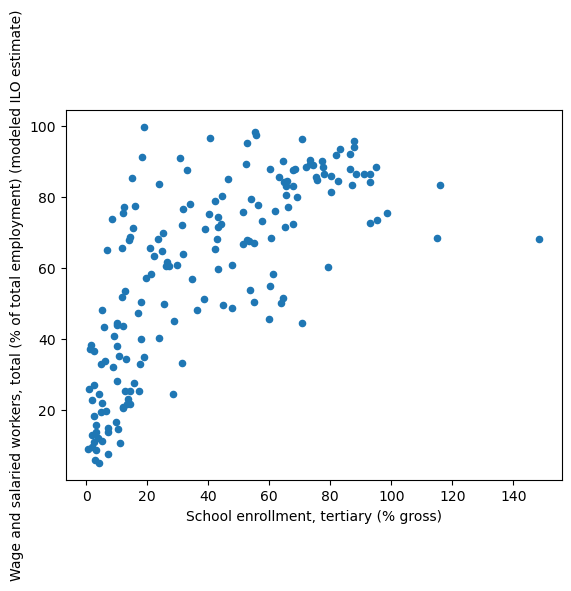

In [10]:
tee.plot.scatter(x='School enrollment, tertiary (% gross)', \
                 y='Wage and salaried workers, total (% of total employment) (modeled ILO estimate)')

<AxesSubplot:xlabel='School enrollment, tertiary (% gross)', ylabel='Vulnerable employment, total (% of total employment) (modeled ILO estimate)'>

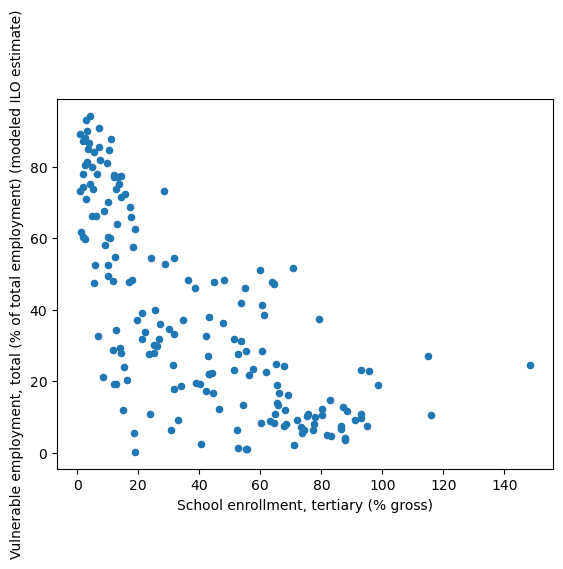

In [11]:
tee.plot.scatter(x='School enrollment, tertiary (% gross)', \
                 y='Vulnerable employment, total (% of total employment) (modeled ILO estimate)')

The percentage of wage and salaried workers appears to be positively correlated to tertiary education enrollment while vulnerable workers population is negatively correlated.

#### Strongest influencing factors:

In [12]:
corrmat = tee.drop(columns=['Country Name']).corr()
corrmat

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.83                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.75                      
Birth rate, crude (per 1,000 people)                                                            -0.82                      
Employment in agriculture (% of total employmen...                                              -0.81                      
Employment in services (% of total employment) ...                                               0.71                      
Fertility rate, total (births per woman)                                                        -0.81                      
Individuals using the Internet (% of population)                                                 0.85                      
Life expectancy at birth, total (years)                                                          0.82                      
Literacy rate, adult total (% of people ages 15...                                               0.76                      
Mortality rate, infant (per 1,000 live births)                                                  -0.81                      
People using at least basic drinking water serv...                                               0.84                      
People using at least basic sanitation services...                                               0.89                      
Probability of dying among adolescents ages 10-...                                              -0.77                      
Probability of dying among adolescents ages 15-...                                              -0.75                      
Probability of dying among children ages 5-9 ye...                                              -0.77                      
Probability of dying among youth ages 20-24 yea...                                              -0.72                      
Rule of Law: Estimate                                                                            0.55                      
School enrollment, preprimary (% gross)                                                          0.56                      
School enrollment, secondary (% gross)                                                           0.82                      
School enrollment, tertiary (% gross)                                                            0.72                      
Urban population (% of total population)                                                         0.67                      
Urban population growth (annual %)                                                              -0.68                      
Vulnerable employment, total (% of total employ...                                              -0.87                      
Wage and salaried workers, total (% of total em...                                               0.86                      

                                                    Access to electricity (% of population)  \
Access to clean fuels and technologies for cook...                                     0.83   
Access to electricity (% of population)                                                1.00   
Adolescent fertility rate (births per 1,000 wom...                                    -0.77   
Birth rate, crude (per 1,000 people)                                                  -0.81   
Employment in agriculture (% of total employmen...                                    -0.75   
Employment in services (% of total employment) ...                                     0.64   
Fertility rate, total (births per woman)                                              -0.82   
Individuals using the Internet (% of population)                   

The factors influencing tertiary education enrollent the most are secondary school enrollment, life expectancy, utility access, waged and salaried working population (positive), mortality and birth rates, and vulnerable working population (negative).

### Feature engineering

The four columns related to the probability of dying all have similarly negative correlations to the target. We can try getting the average among different age groups to narrow down this probability to one value.

<AxesSubplot:ylabel='Frequency'>

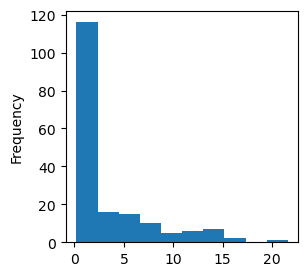

In [13]:
# plot distribution of probability of dying by age group
plt.figure(figsize=(3,3))
tee['Probability of dying among children ages 5-9 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

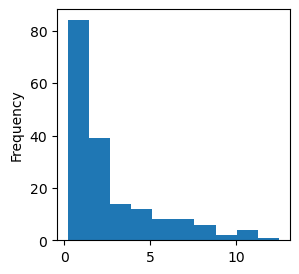

In [14]:
plt.figure(figsize=(3,3))
tee['Probability of dying among adolescents ages 10-14 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

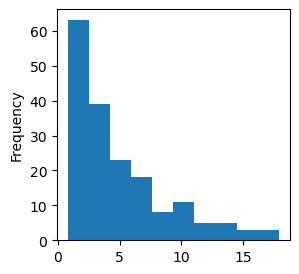

In [15]:
plt.figure(figsize=(3,3))
tee['Probability of dying among adolescents ages 15-19 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

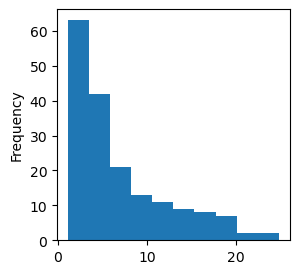

In [16]:
plt.figure(figsize=(3,3))
tee['Probability of dying among youth ages 20-24 years (per 1,000)'].plot.hist()

In [17]:
# copy the dataset
tee_copy = tee.copy()

# rename probability columns
tee_copy['pod_5_9'] = tee_copy['Probability of dying among children ages 5-9 years (per 1,000)']
tee_copy['pod_10_14'] = tee_copy['Probability of dying among adolescents ages 10-14 years (per 1,000)']
tee_copy['pod_15_19'] = tee_copy['Probability of dying among adolescents ages 15-19 years (per 1,000)']
tee_copy['pod_20_24'] = tee_copy['Probability of dying among youth ages 20-24 years (per 1,000)']

In [18]:
tee_2 = tee_copy.copy()
tee_2['pod_avg'] = (tee_2['pod_5_9'] + tee_2['pod_10_14'] + tee_2['pod_15_19'] + tee_2['pod_20_24']) / 4
tee_2['pod_avg']

0      8.98
1      1.43
2      2.25
3     12.12
4      2.38
       ... 
173    2.35
174    2.65
175    7.75
176    8.15
177    9.12
Name: pod_avg, Length: 178, dtype: float64

Distributions are right-skewed, so we can try to normalize using log transformation.

<AxesSubplot:ylabel='Frequency'>

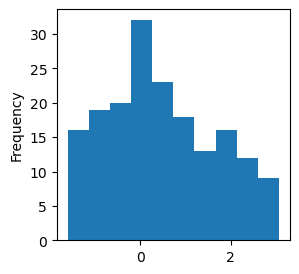

In [19]:
plt.figure(figsize=(3,3))
tee_copy['pod_5_9'] = np.log(tee_copy['pod_5_9'])
tee_copy['pod_5_9'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

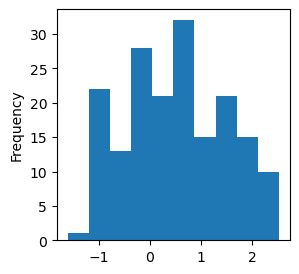

In [20]:
plt.figure(figsize=(3,3))
tee_copy['pod_10_14'] = np.log(tee_copy['pod_10_14'])
tee_copy['pod_10_14'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

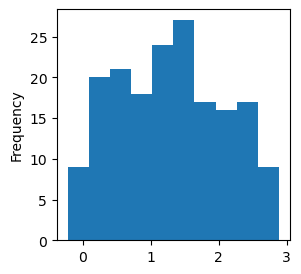

In [21]:
plt.figure(figsize=(3,3))
tee_copy['pod_15_19'] = np.log(tee_copy['pod_15_19'])
tee_copy['pod_15_19'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

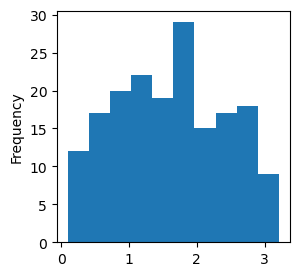

In [22]:
plt.figure(figsize=(3,3))
tee_copy['pod_20_24'] = np.log(tee_copy['pod_20_24'])
tee_copy['pod_20_24'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

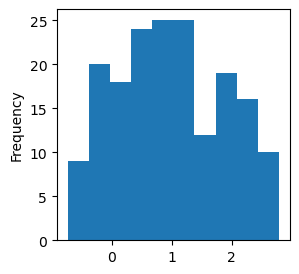

In [23]:
# get average of four probability of dying columns
tee_copy['pod_avg'] = (tee_copy['pod_5_9'] + tee_copy['pod_10_14'] + tee_copy['pod_15_19'] + tee_copy['pod_20_24']) / 4
# display distribution of feature after log transformation
plt.figure(figsize=(3,3))
tee_copy.pod_avg.plot.hist()

The log transformation shifted the distribution, and it now bears closer resemblance to a normal distribution.

We can view a sample of the tertiary education dataset with the new feature (using log transformation):

In [24]:
# view sample of tertiary education enrollment copied dataset with additional feature
tee_copy.sample(10).T

164          113  \
Country Name                                        Uganda  New Zealand   
Access to clean fuels and technologies for cook...    0.80       100.00   
Access to electricity (% of population)              41.30       100.00   
Adolescent fertility rate (births per 1,000 wom...  112.08        13.62   
Birth rate, crude (per 1,000 people)                 37.67        11.96   
Employment in agriculture (% of total employmen...   63.51         5.82   
Employment in services (% of total employment) ...   27.46        74.66   
Fertility rate, total (births per woman)              4.81         1.72   
Individuals using the Internet (% of population)      6.02        89.86   
Life expectancy at birth, total (years)              62.99        82.06   
Literacy rate, adult total (% of people ages 15...   76.53        99.00   
Mortality rate, infant (per 1,000 live births)       33.20         4.10   
People using at least basic drinking water serv...   54.33       100.00   
People using at least basic sanitation services...   20.41       100.00   
Probability of dying among adolescents ages 10-...    5.30         0.60   
Probability of dying among adolescents ages 15-...   13.70         2.00   
Probability of dying among children ages 5-9 ye...    8.40         0.40   
Probability of dying among youth ages 20-24 yea...   14.30         2.80   
Rule of Law: Estimate                                -0.33         1.88   
School enrollment, preprimary (% gross)              14.41        91.66   
School enrollment, secondary (% gross)               25.44       123.14   
School enrollment, tertiary (% gross)                 5.14        80.30   
Urban population (% of total population)             24.36        86.61   
Urban population growth (annual %)                    5.83         1.68   
Vulnerable employment, total (% of total employ...   73.79        12.29   
Wage and salaried workers, total (% of total em...   22.16        81.44   
pod_5_9                                               2.13        -0.92   
pod_10_14                                             1.67        -0.51   
pod_15_19                                             2.62         0.69   
pod_20_24                                             2.66         1.03   
pod_avg                                               2.27         0.07   

                                                      58       129    83   \
Country Name                                        Gabon  Romania  Kenya   
Access to clean fuels and technologies for cook...  88.80   100.00  19.50   
Access to electricity (% of population)             90.32   100.00  69.70   
Adolescent fertility rate (births per 1,000 wom...  94.80    37.09  69.58   
Birth rate, crude (per 1,000 people)                28.35    10.30  28.46   
Employment in agriculture (% of total employmen...  30.00    21.24  33.59   
Employment in services (% of total employment) ...  54.74    48.69  51.41   
Fertility rate, total (births per woman)             3.62     1.77   3.47   
Individuals using the Internet (% of population)    68.69    73.66  22.67   
Life expectancy at birth, total (years)             66.60    75.61  62.94   
Literacy rate, adult total (% of people ages 15...  84.67    98.84  81.53   
Mortality rate, infant (per 1,000 live births)      31.20     5.80  29.70   
People using at least basic drinking water serv...  85.98   100.00  60.86   
People using at least basic sanitation services...  49.78    86.54  35.30   
Probability of dying among adolescents ages 10-...   6.90     1.00   4.40   
Probability of dying among adolescents ages 15-...   7.10     2.00   6.30   
Probability of dying among children ages 5-9 ye...   5.50     0.80   5.20   
Probability of dying among youth ages 20-24 yea...   8.40     2.60  10.00   
Rule of Law: Estimate                               -0.74     0.44  -0.44   
School enrollment, preprimary (% gross)             42.99    93.68  65.14   
School enrollment, secondary (% gross

In [25]:
corrmat_copy = tee_copy.drop(columns=['Country Name', 'Probability of dying among children ages 5-9 years (per 1,000)',\
                        'Probability of dying among adolescents ages 10-14 years (per 1,000)',\
                        'Probability of dying among adolescents ages 15-19 years (per 1,000)',\
                        'Probability of dying among youth ages 20-24 years (per 1,000)']).corr()
corrmat_copy

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.83                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.75                      
Birth rate, crude (per 1,000 people)                                                            -0.82                      
Employment in agriculture (% of total employmen...                                              -0.81                      
Employment in services (% of total employment) ...                                               0.71                      
Fertility rate, total (births per woman)                                                        -0.81                      
Individuals using the Internet (% of population)                                                 0.85                      
Life expectancy at birth, total (years)                                                          0.82                      
Literacy rate, adult total (% of people ages 15...                                               0.76                      
Mortality rate, infant (per 1,000 live births)                                                  -0.81                      
People using at least basic drinking water serv...                                               0.84                      
People using at least basic sanitation services...                                               0.89                      
Rule of Law: Estimate                                                                            0.55                      
School enrollment, preprimary (% gross)                                                          0.56                      
School enrollment, secondary (% gross)                                                           0.82                      
School enrollment, tertiary (% gross)                                                            0.72                      
Urban population (% of total population)                                                         0.67                      
Urban population growth (annual %)                                                              -0.68                      
Vulnerable employment, total (% of total employ...                                              -0.87                      
Wage and salaried workers, total (% of total em...                                               0.86                      
pod_5_9                                                                                         -0.81                      
pod_10_14                                                                                       -0.79                      
pod_15_19                                                                                       -0.74                      
pod_20_24                                                                                       -0.72                      
pod_avg                                                                                         -0.79                      

                                                    Access to electricity (% of population)  \
Access to clean fuels and technologies for cook...                                     0.83   
Access to electricity (% of population)                                                1.00   
Adolescent fertility rate (births per 1,000 wom...                                    -0.77   
Birth rate, crude (per 1,000 people)                                                  -0.81   
Employment in agriculture (% of total employmen...                                    -0.75   
Employment in services (% of total employment) ...                                     0.64   
Fertility rate, total (births per woma

We can also view a sample of the tertiary education dataset with the new feature without log transformation:

In [26]:
# view sample of tertiary education enrollment copied dataset with additional feature
tee_2[['pod_5_9', 'pod_10_14', 'pod_15_19', 'pod_20_24', 'pod_avg']].sample(10).T

87   84   106  168  152  163  75    99    175  35 
pod_5_9   2.90 0.40 0.40 0.60 0.30 1.90 2.70 13.70  4.60 3.90
pod_10_14 4.60 0.40 0.50 0.80 0.40 1.90 2.80  8.70  2.60 1.80
pod_15_19 4.70 1.10 1.50 2.60 1.10 4.60 4.30 10.00  8.90 3.80
pod_20_24 7.40 1.70 2.20 4.80 1.50 5.90 5.30 12.00 14.90 4.30
pod_avg   4.90 0.90 1.15 2.20 0.82 3.57 3.78 11.10  7.75 3.45

In [27]:
corrmat_2 = tee_2.drop(columns=['Country Name', 'Probability of dying among children ages 5-9 years (per 1,000)',\
                        'Probability of dying among adolescents ages 10-14 years (per 1,000)',\
                        'Probability of dying among adolescents ages 15-19 years (per 1,000)',\
                        'Probability of dying among youth ages 20-24 years (per 1,000)']).corr()
corrmat_2

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.83                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.75                      
Birth rate, crude (per 1,000 people)                                                            -0.82                      
Employment in agriculture (% of total employmen...                                              -0.81                      
Employment in services (% of total employment) ...                                               0.71                      
Fertility rate, total (births per woman)                                                        -0.81                      
Individuals using the Internet (% of population)                                                 0.85                      
Life expectancy at birth, total (years)                                                          0.82                      
Literacy rate, adult total (% of people ages 15...                                               0.76                      
Mortality rate, infant (per 1,000 live births)                                                  -0.81                      
People using at least basic drinking water serv...                                               0.84                      
People using at least basic sanitation services...                                               0.89                      
Rule of Law: Estimate                                                                            0.55                      
School enrollment, preprimary (% gross)                                                          0.56                      
School enrollment, secondary (% gross)                                                           0.82                      
School enrollment, tertiary (% gross)                                                            0.72                      
Urban population (% of total population)                                                         0.67                      
Urban population growth (annual %)                                                              -0.68                      
Vulnerable employment, total (% of total employ...                                              -0.87                      
Wage and salaried workers, total (% of total em...                                               0.86                      
pod_5_9                                                                                         -0.77                      
pod_10_14                                                                                       -0.77                      
pod_15_19                                                                                       -0.75                      
pod_20_24                                                                                       -0.72                      
pod_avg                                                                                         -0.79                      

                                                    Access to electricity (% of population)  \
Access to clean fuels and technologies for cook...                                     0.83   
Access to electricity (% of population)                                                1.00   
Adolescent fertility rate (births per 1,000 wom...                                    -0.77   
Birth rate, crude (per 1,000 people)                                                  -0.81   
Employment in agriculture (% of total employmen...                                    -0.75   
Employment in services (% of total employment) ...                                     0.64   
Fertility rate, total (births per woma

It looks like creating this new feature helps us slightly reduce the dimensionality of our dataset. The resulting average is reflective of the four probability attributes, still showing a relatively strong positive correlation to the target. We can go ahead and drop the for probability columns and give our new feature a more descriptive name.

In [28]:
tee.shape

(178, 26)

In [29]:
tee = tee.drop(columns=['Probability of dying among children ages 5-9 years (per 1,000)',\
                        'Probability of dying among adolescents ages 10-14 years (per 1,000)',\
                        'Probability of dying among adolescents ages 15-19 years (per 1,000)',\
                        'Probability of dying among youth ages 20-24 years (per 1,000)'])
tee['Probability of dying among people ages 5-24 (per 1000)'] = tee_2['pod_avg']

In [30]:
tee.shape

(178, 23)

### Column scaling

With the exception of dollar amounts, number of years, and consumption in liters in the columns, this dataset mostly expresses values as percentages. The remaining columns are per 1000, which could be expressed as percentages in an effort to make this dataset a bit more cohesive.

In [31]:
tee.filter(like='per 1').columns

Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Birth rate, crude (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Probability of dying among people ages 5-24 (per 1000)'],
      dtype='object')

In [32]:
tee_3 = tee.copy()
tee_3['Adolescent fertility rate (births per 1,000 women ages 15-19)'] \
= tee_3['Adolescent fertility rate (births per 1,000 women ages 15-19)'] / 10
tee_3['Birth rate, crude (per 1,000 people)'] = tee_3['Birth rate, crude (per 1,000 people)'] / 10
tee_3['Mortality rate, infant (per 1,000 live births)'] = tee_3['Mortality rate, infant (per 1,000 live births)'] / 10
tee_3['Probability of dying among people ages 5-24 (per 1000)'] \
= tee_3['Probability of dying among people ages 5-24 (per 1000)'] / 10

In [33]:
tee_3.rename(columns = {'Adolescent fertility rate (births per 1,000 women ages 15-19)':\
                        'Adolescent fertility rate (per 100 women ages 15-19)', 'Birth rate, crude (per 1,000 people)':\
                        'Birth rate, crude (per 100 people)', 'Mortality rate, infant (per 1,000 live births)':\
                        'Mortality rate, infant (per 100 live births)', \
                        'Probability of dying among people ages 5-24 (per 1000)': \
                        'Probability of dying (avg) among people ages 5-24 (per 100)'}, inplace = True)

In [34]:
tee_3[['Adolescent fertility rate (per 100 women ages 15-19)',
       'Birth rate, crude (per 100 people)',
       'Mortality rate, infant (per 100 live births)',
       'Probability of dying (avg) among people ages 5-24 (per 100)']].head()

Adolescent fertility rate (per 100 women ages 15-19)  \
0                                               8.68      
1                                               1.50      
2                                               1.23      
3                                              14.13      
4                                               4.62      

   Birth rate, crude (per 100 people)  \
0                                3.65   
1                                1.03   
2                                2.33   
3                                3.97   
4                                1.48   

   Mortality rate, infant (per 100 live births)  \
0                                          4.63   
1                                          0.84   
2                                          2.01   
3                                          5.04   
4                                          0.76   

   Probability of dying (avg) among people ages 5-24 (per 100)  
0                                               0.90            
1                                               0.14            
2                                               0.23            
3                                               1.21            
4                                               0.24

In [35]:
tee = tee_3.copy()

### Feature selection

<function matplotlib.pyplot.show(close=None, block=None)>

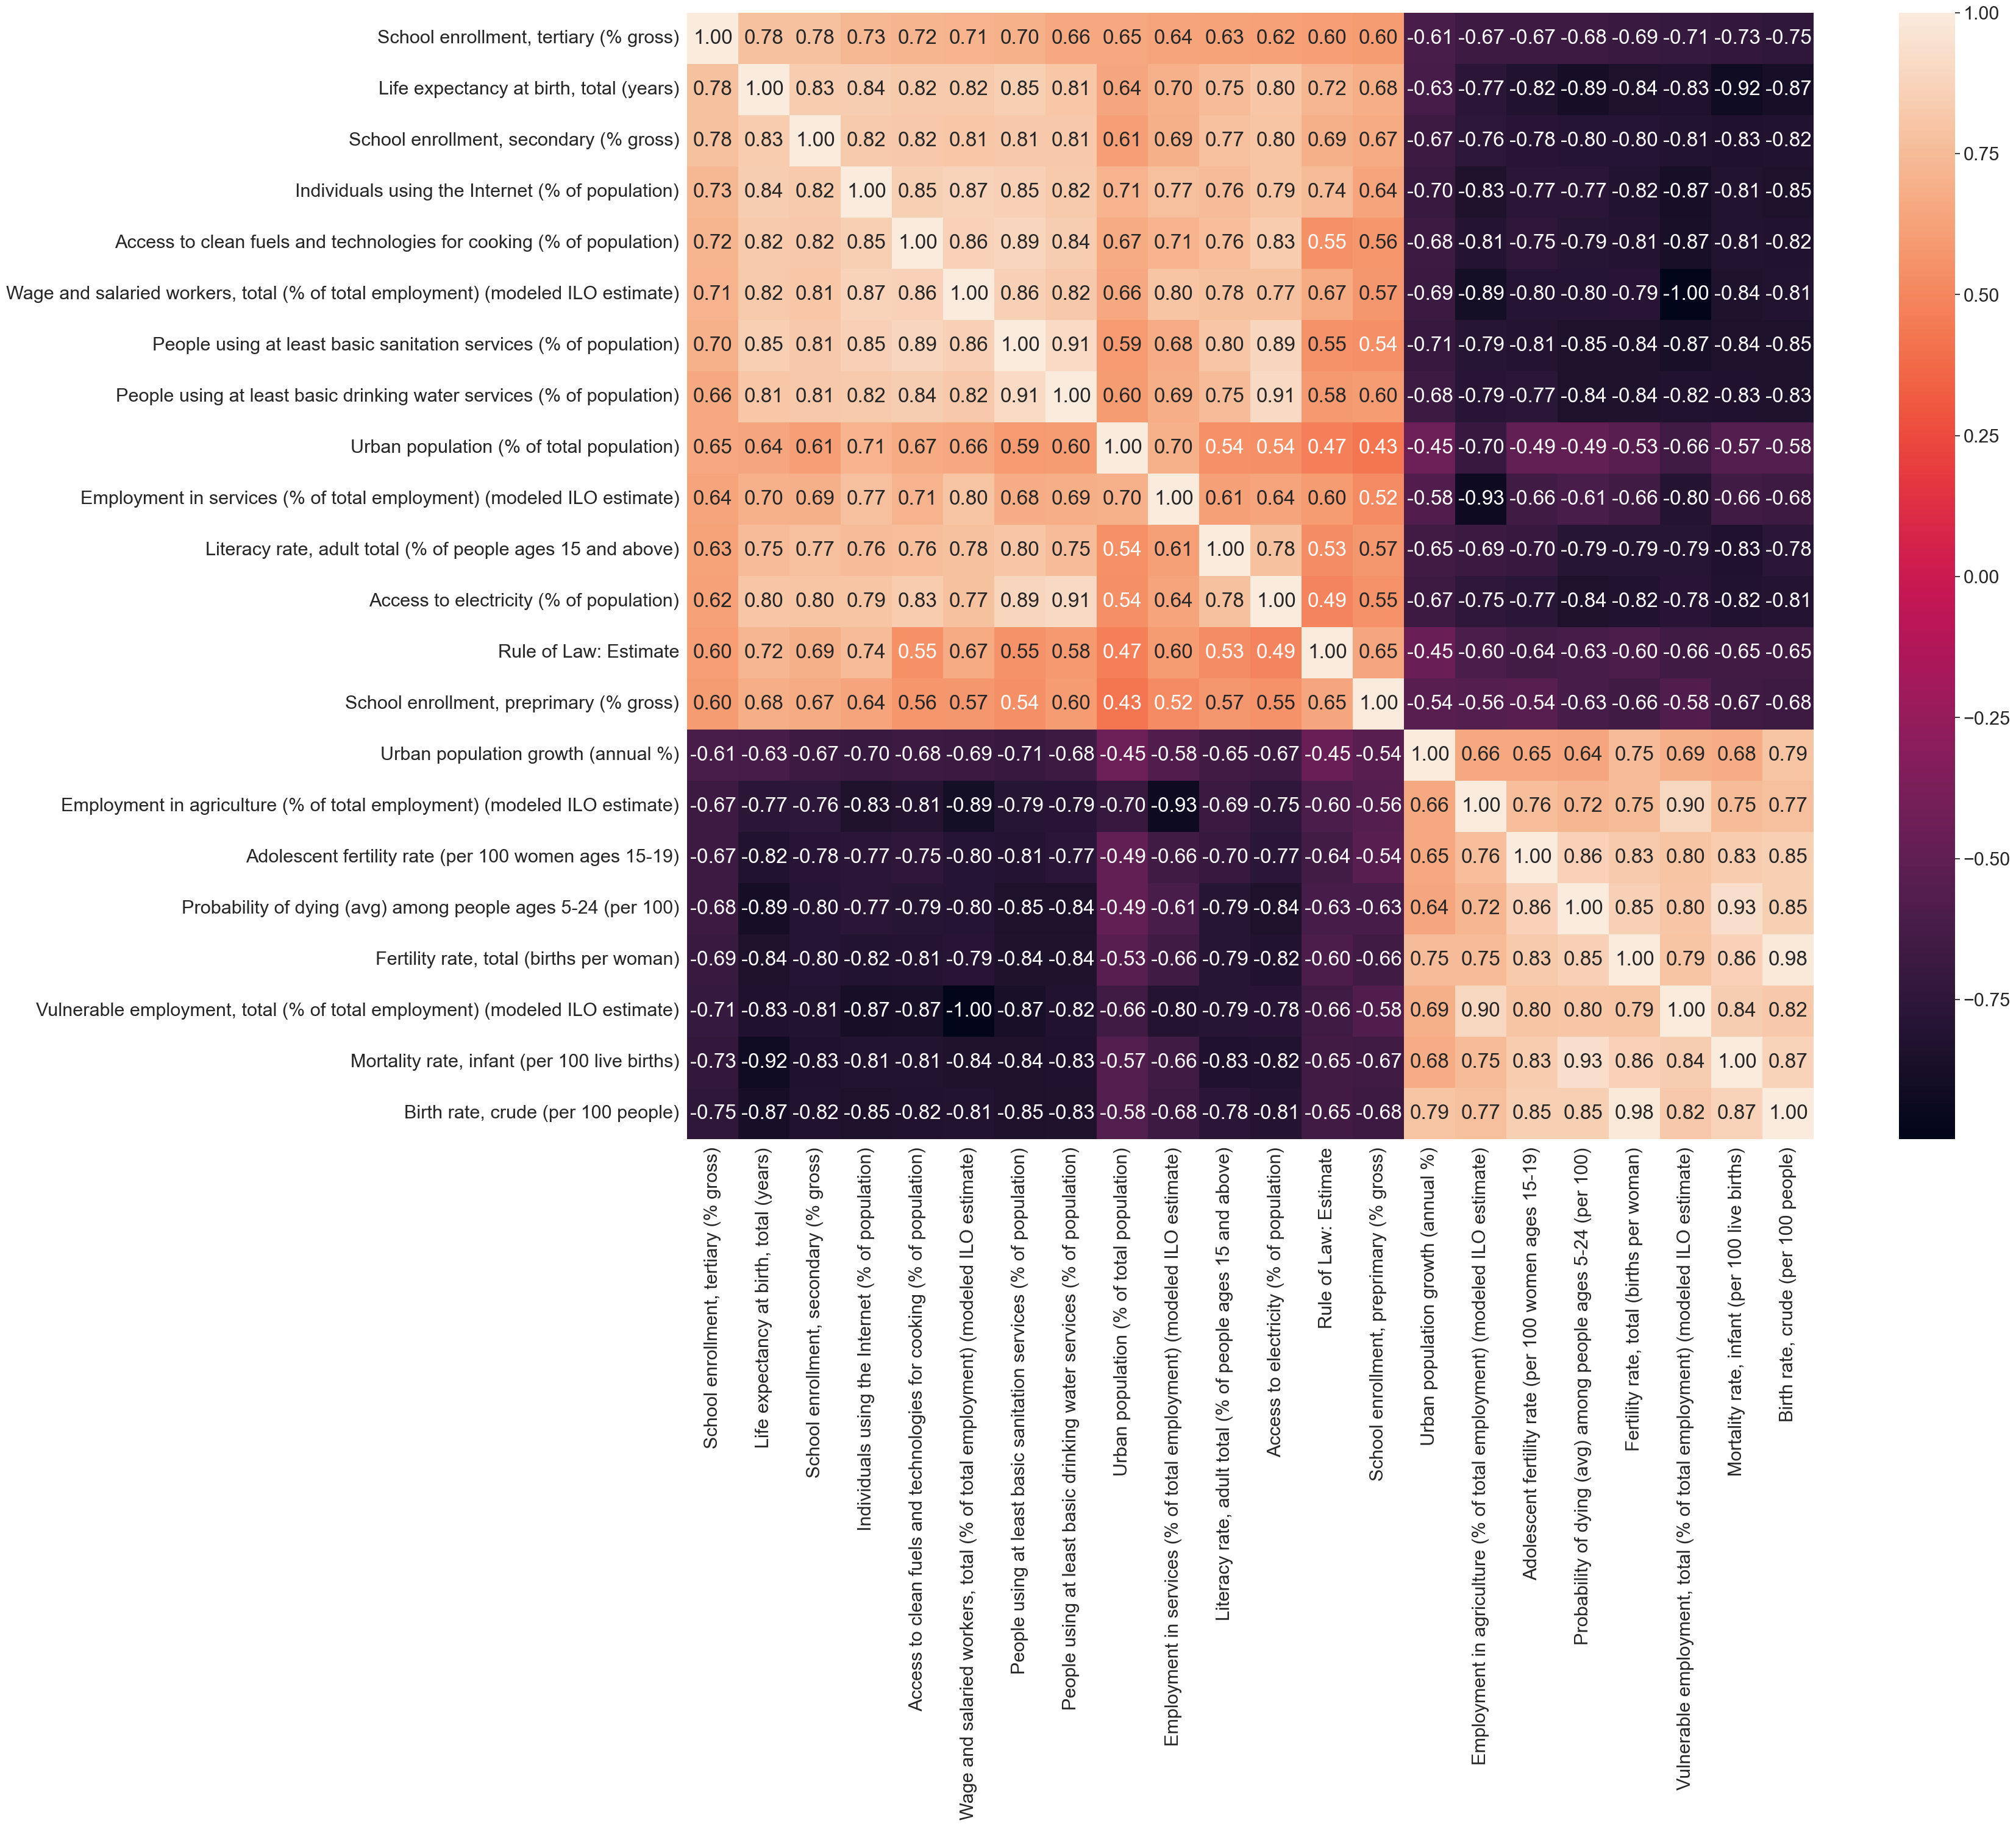

In [36]:
corrmat = tee.drop(columns=['Country Name']).corr()
k = 22
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(tee[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(36,24))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':24},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

The strongest correlation shown here is life expectancy, followed by secondary school enrollment, use of internet, access to clean fuels, and percentage of workers with wages and salaries. This sequence of correlations is different that that of the aggregates. 

However, it is also notable that the strongest correlation is 0.78, much lower than we saw with the aggregates' of 0.94. We also started with more features for the aggregates.

Text(0.5, 1.0, 'Tertiary Enrollment by Country, 2019')

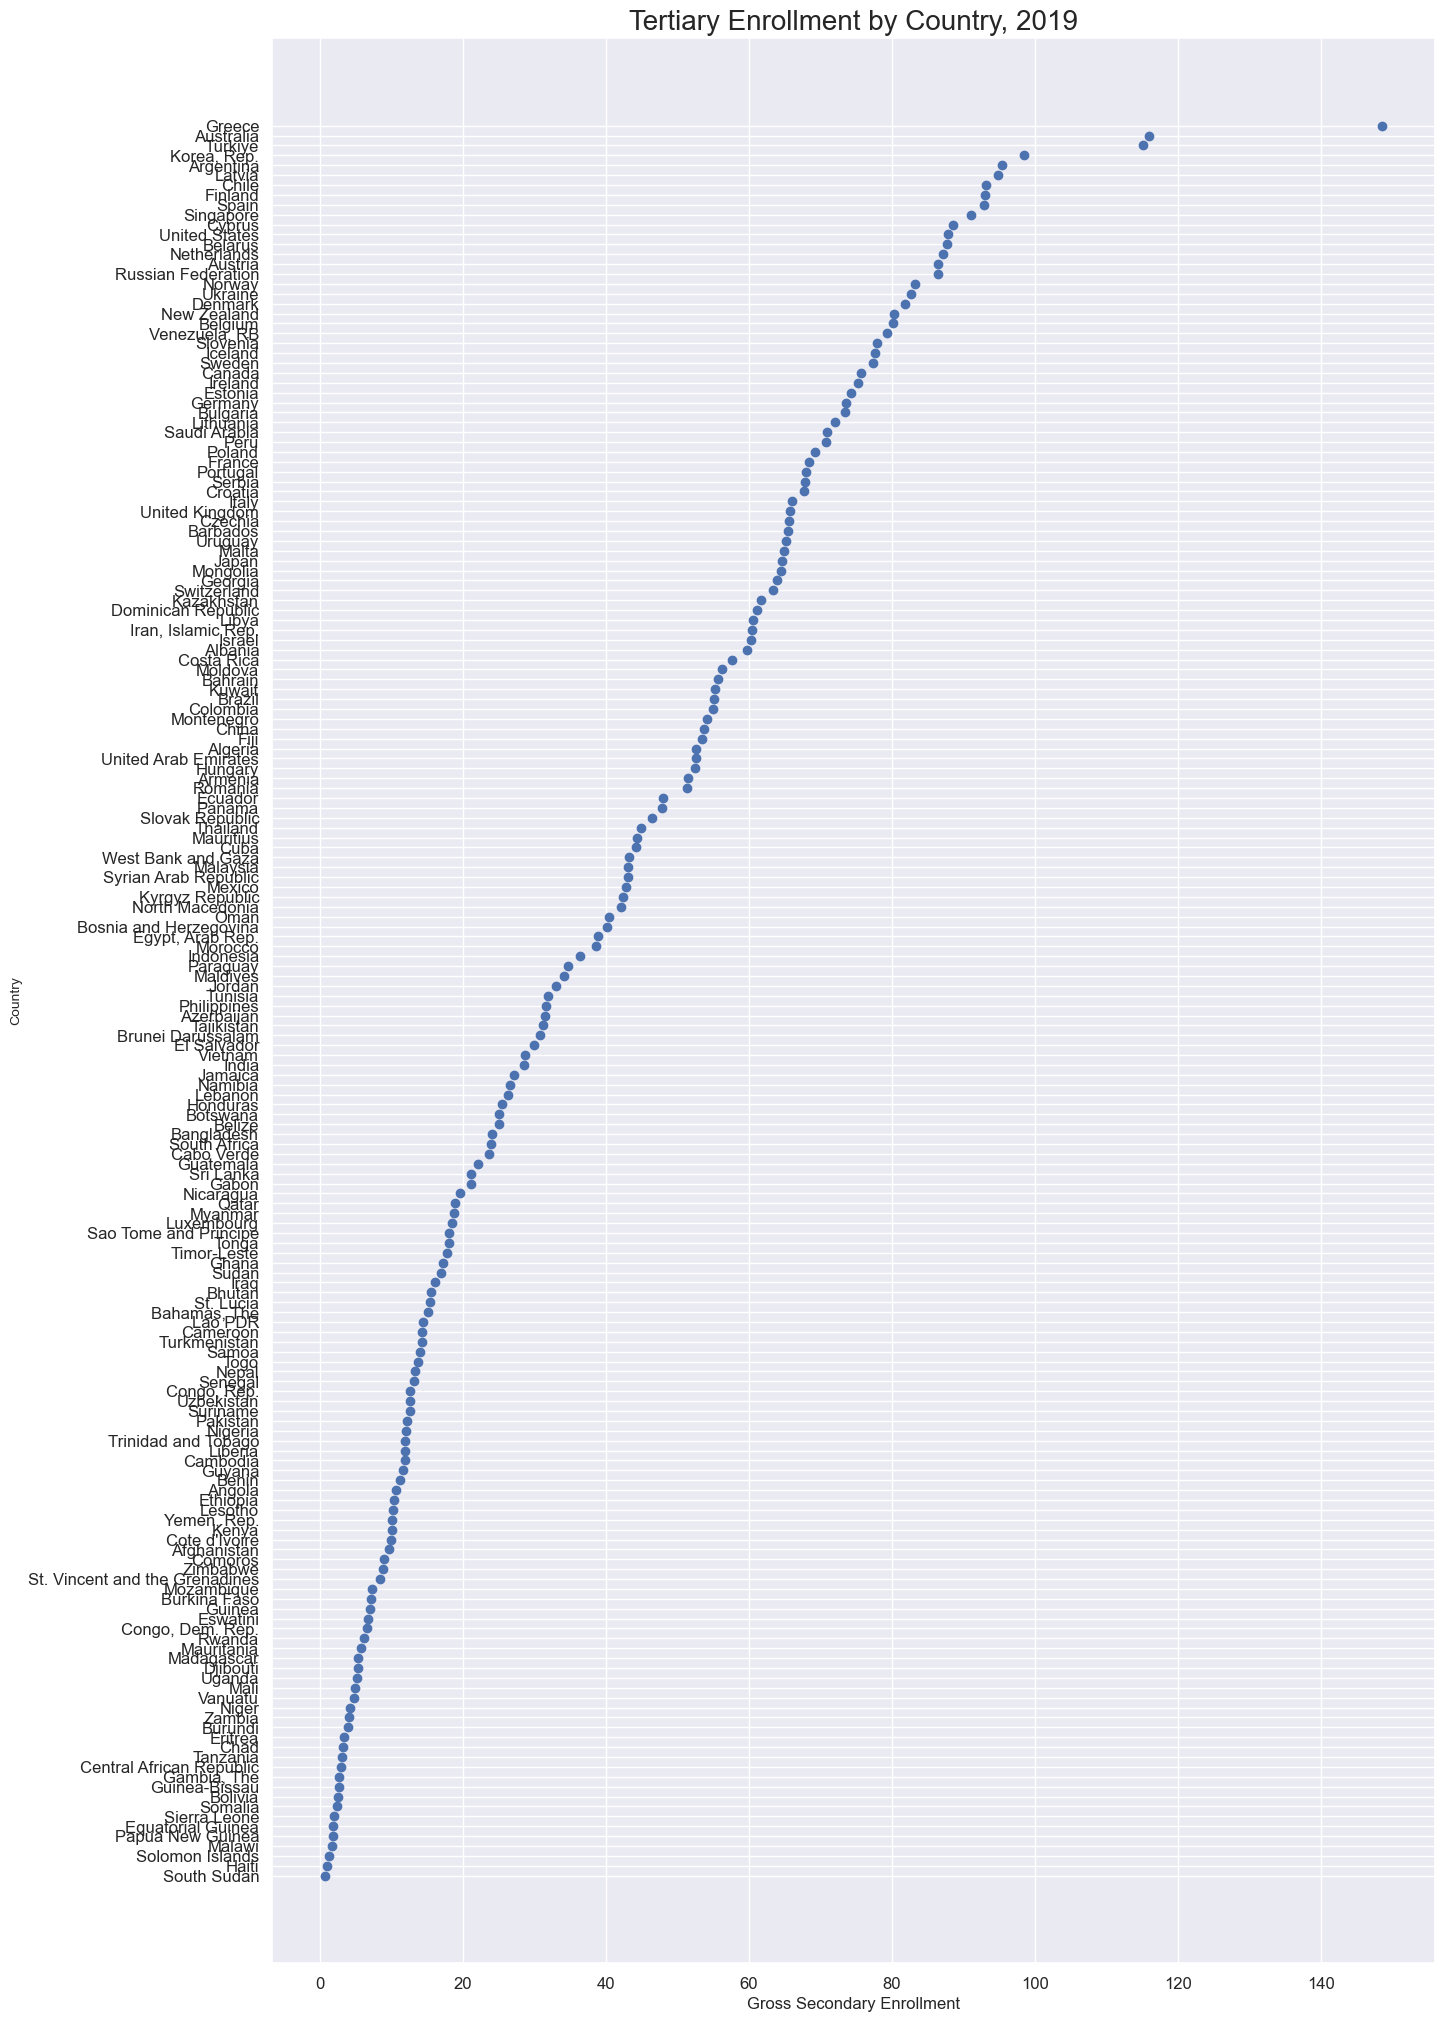

In [37]:
# plot secondary enrollment rates by country
tee_tee = tee.sort_values('School enrollment, tertiary (% gross)', ascending=True)
plt.figure(figsize=(15,25))
plt.scatter(x=tee_tee['School enrollment, tertiary (% gross)'], y=tee_tee['Country Name'])
plt.xticks(range(0,160,20), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Gross Secondary Enrollment', fontsize=12)
plt.ylabel('Country', fontsize=10)
plt.title('Tertiary Enrollment by Country, 2019', size=20)

Like we did for aggregates, we will consider features that may be in fact dependent on the intended target variable. These are life expectancy, mortality, and fertility rates.

<AxesSubplot:xlabel='Life expectancy at birth, total (years)', ylabel='Country Name'>

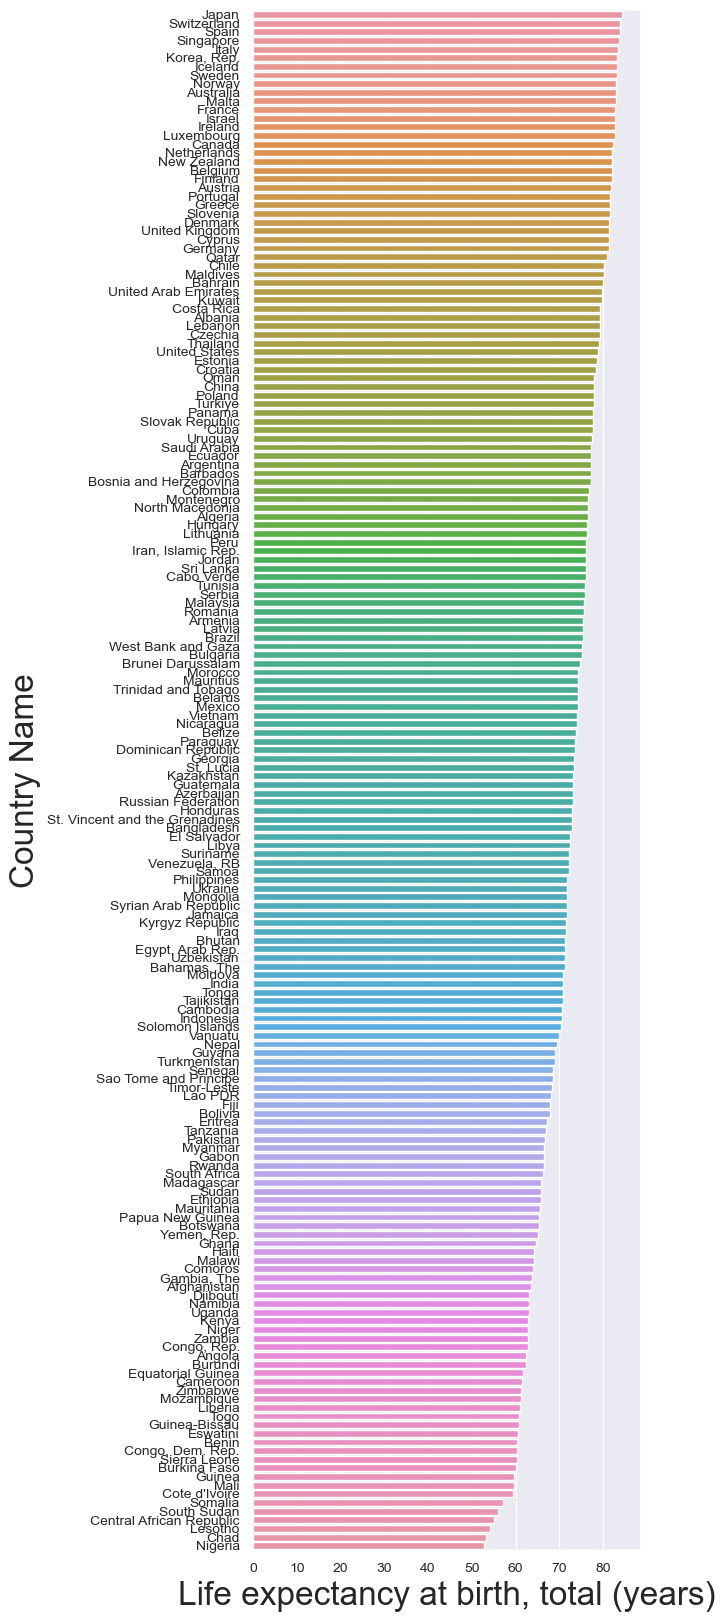

In [38]:
tee_tee_1 = tee.sort_values('Life expectancy at birth, total (years)',ascending=False)
plt.figure(figsize=(5,20))
plt.xticks(range(0,110,10), fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(x = 'Life expectancy at birth, total (years)', y = 'Country Name', data = tee_tee_1)

In [39]:
tee_tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).head(10)

Country Name  \
63        Greece   
6      Australia   
162      Turkiye   
84   Korea, Rep.   
4      Argentina   
88        Latvia   
32         Chile   
56       Finland   
145        Spain   
138    Singapore   

     Access to clean fuels and technologies for cooking (% of population)  \
63                                              100.00                      
6                                               100.00                      
162                                              95.40                      
84                                              100.00                      
4                                                99.90                      
88                                              100.00                      
32                                              100.00                      
56                                              100.00                      
145                                             100.00                      
138                                             100.00                      

     Access to electricity (% of population)  \
63                                    100.00   
6                                     100.00   
162                                   100.00   
84                                    100.00   
4                                     100.00   
88                                    100.00   
32                                    100.00   
56                                    100.00   
145                                   100.00   
138                                   100.00   

     Adolescent fertility rate (per 100 women ages 15-19)  \
63                                                0.83      
6                                                 0.89      
162                                               1.93      
84                                                0.24      
4                                                 4.62      
88                                                1.24      
32                                                2.41      
56                                                0.41      
145                                               0.59      
138                                               0.25      

     Birth rate, crude (per 100 people)  \
63                                 0.78   
6                                  1.21   
162                                1.56   
84                                 0.59   
4                                  1.48   
88                                 0.98   
32                                 1.19   
56                                 0.83   
145                                0.76   
138                                0.88   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
63                                               11.60                          
6                                                 2.56                          
162                                              18.11                          
84                                                5.14                          
4                                                 7.74                          
88                                                7.29                          
32                                                9.07                          
56                                                3.78                          
145                                               4.03                          
138                                               0.40                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
63                                               73.06                       
6                                                78.38                       
162                                              56.57                       
84                                               70.28  

In [40]:
tee_tee_1.head(10)

Country Name  \
80         Japan   
152  Switzerland   
145        Spain   
138    Singapore   
78         Italy   
84   Korea, Rep.   
71       Iceland   
151       Sweden   
118       Norway   
6      Australia   

     Access to clean fuels and technologies for cooking (% of population)  \
80                                              100.00                      
152                                             100.00                      
145                                             100.00                      
138                                             100.00                      
78                                              100.00                      
84                                              100.00                      
71                                              100.00                      
151                                             100.00                      
118                                             100.00                      
6                                               100.00                      

     Access to electricity (% of population)  \
80                                    100.00   
152                                   100.00   
145                                   100.00   
138                                   100.00   
78                                    100.00   
84                                    100.00   
71                                    100.00   
151                                   100.00   
118                                   100.00   
6                                     100.00   

     Adolescent fertility rate (per 100 women ages 15-19)  \
80                                                0.28      
152                                               0.22      
145                                               0.59      
138                                               0.25      
78                                                0.39      
84                                                0.24      
71                                                0.55      
151                                               0.34      
118                                               0.24      
6                                                 0.89      

     Birth rate, crude (per 100 people)  \
80                                 0.70   
152                                1.00   
145                                0.76   
138                                0.88   
78                                 0.70   
84                                 0.59   
71                                 1.23   
151                                1.11   
118                                1.02   
6                                  1.21   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
80                                                3.27                          
152                                               2.59                          
145                                               4.03                          
138                                               0.40                          
78                                                3.89                          
84                                                5.14                          
71                                                4.04                          
151                                               1.69                          
118                                               2.04                          
6                                                 2.56                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
80                                               72.48                       
152                                              77.07                       
145                                              75.54                       
138                                              84.88  

Looking at the top ten countries for each topic, four of them reporting the highest tertiary enrollment rates also reported some of the highest values for life expectancy. Also, at least half of the countries making up both groups are in the Europe & Central Asia region. 

In [41]:
tee_tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).tail(10)

Country Name  \
66       Guinea-Bissau   
18             Bolivia   
142            Somalia   
137       Sierra Leone   
50   Equatorial Guinea   
122   Papua New Guinea   
96              Malawi   
141    Solomon Islands   
68               Haiti   
144        South Sudan   

     Access to clean fuels and technologies for cooking (% of population)  \
66                                                1.00                      
18                                               86.50                      
142                                               3.10                      
137                                               0.70                      
50                                               24.00                      
122                                               9.30                      
96                                                1.80                      
141                                               8.90                      
68                                                4.10                      
144                                               0.00                      

     Access to electricity (% of population)  \
66                                     30.93   
18                                     95.08   
142                                    49.20   
137                                    22.70   
50                                     66.57   
122                                    23.60   
96                                     11.20   
141                                    69.40   
68                                     45.44   
144                                     6.77   

     Adolescent fertility rate (per 100 women ages 15-19)  \
66                                                9.14      
18                                                6.56      
142                                              12.11      
137                                              10.67      
50                                               14.89      
122                                               5.71      
96                                               12.14      
141                                               6.14      
68                                                5.42      
144                                               9.88      

     Birth rate, crude (per 100 people)  \
66                                 3.21   
18                                 2.23   
142                                4.46   
137                                3.25   
50                                 3.19   
122                                2.64   
96                                 3.36   
141                                3.08   
68                                 2.43   
144                                2.91   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
66                                               51.02                          
18                                               28.36                          
142                                              26.89                          
137                                              44.48                          
50                                               55.75                          
122                                              19.22                          
96                                               62.39                          
141                                              38.71                          
68                                               46.44                          
144                                              62.32                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
66                                               38.83                       
18                                               51.49                       
142                                              56.01                    

In [42]:
tee_tee_1.tail(10)

Country Name  \
24               Burkina Faso   
65                     Guinea   
99                       Mali   
39              Cote d'Ivoire   
142                   Somalia   
144               South Sudan   
30   Central African Republic   
90                    Lesotho   
31                       Chad   
116                   Nigeria   

     Access to clean fuels and technologies for cooking (% of population)  \
24                                               10.30                      
65                                                0.90                      
99                                                0.90                      
39                                               28.70                      
142                                               3.10                      
144                                               0.00                      
30                                                0.80                      
90                                               39.60                      
31                                                6.60                      
116                                              12.80                      

     Access to electricity (% of population)  \
24                                     17.60   
65                                     42.20   
99                                     47.85   
39                                     68.57   
142                                    49.20   
144                                     6.77   
30                                     14.30   
90                                     44.56   
31                                      8.40   
116                                    55.40   

     Adolescent fertility rate (per 100 women ages 15-19)  \
24                                               11.34      
65                                               12.03      
99                                               15.38      
39                                               10.72      
142                                              12.11      
144                                               9.88      
30                                               16.26      
90                                                9.12      
31                                               14.34      
116                                              10.28      

     Birth rate, crude (per 100 people)  \
24                                 3.67   
65                                 3.54   
99                                 4.24   
39                                 3.46   
142                                4.46   
144                                2.91   
30                                 4.19   
90                                 2.68   
31                                 4.42   
116                                3.78   

     Employment in agriculture (% of total employment) (modeled ILO estimate)  \
24                                               74.38                          
65                                               59.60                          
99                                               65.67                          
39                                               45.94                          
142                                              26.89                          
144                                              62.32                          
30                                               69.12                          
90                                               29.83                          
31                                               69.74                          
116                                              35.52                          

     Employment in services (% of total employment) (modeled ILO estimate)  \
24                                               19.03                       
65                                               33.68                       
99  

Looking at the bottom ten for each topic, two reporting the lowest tertiary enrollment rates also reported some of the lowest values for life expectancy. Also, more than half of the countries making up both groups (all in the bottom ten for life expectancy) are in the Sub-Saharan Africa region. The remaining countries form parts of East Asia & Pacific and Latin America & the Caribbean regions.

<AxesSubplot:xlabel='Probability of dying (avg) among people ages 5-24 (per 100)', ylabel='Country Name'>

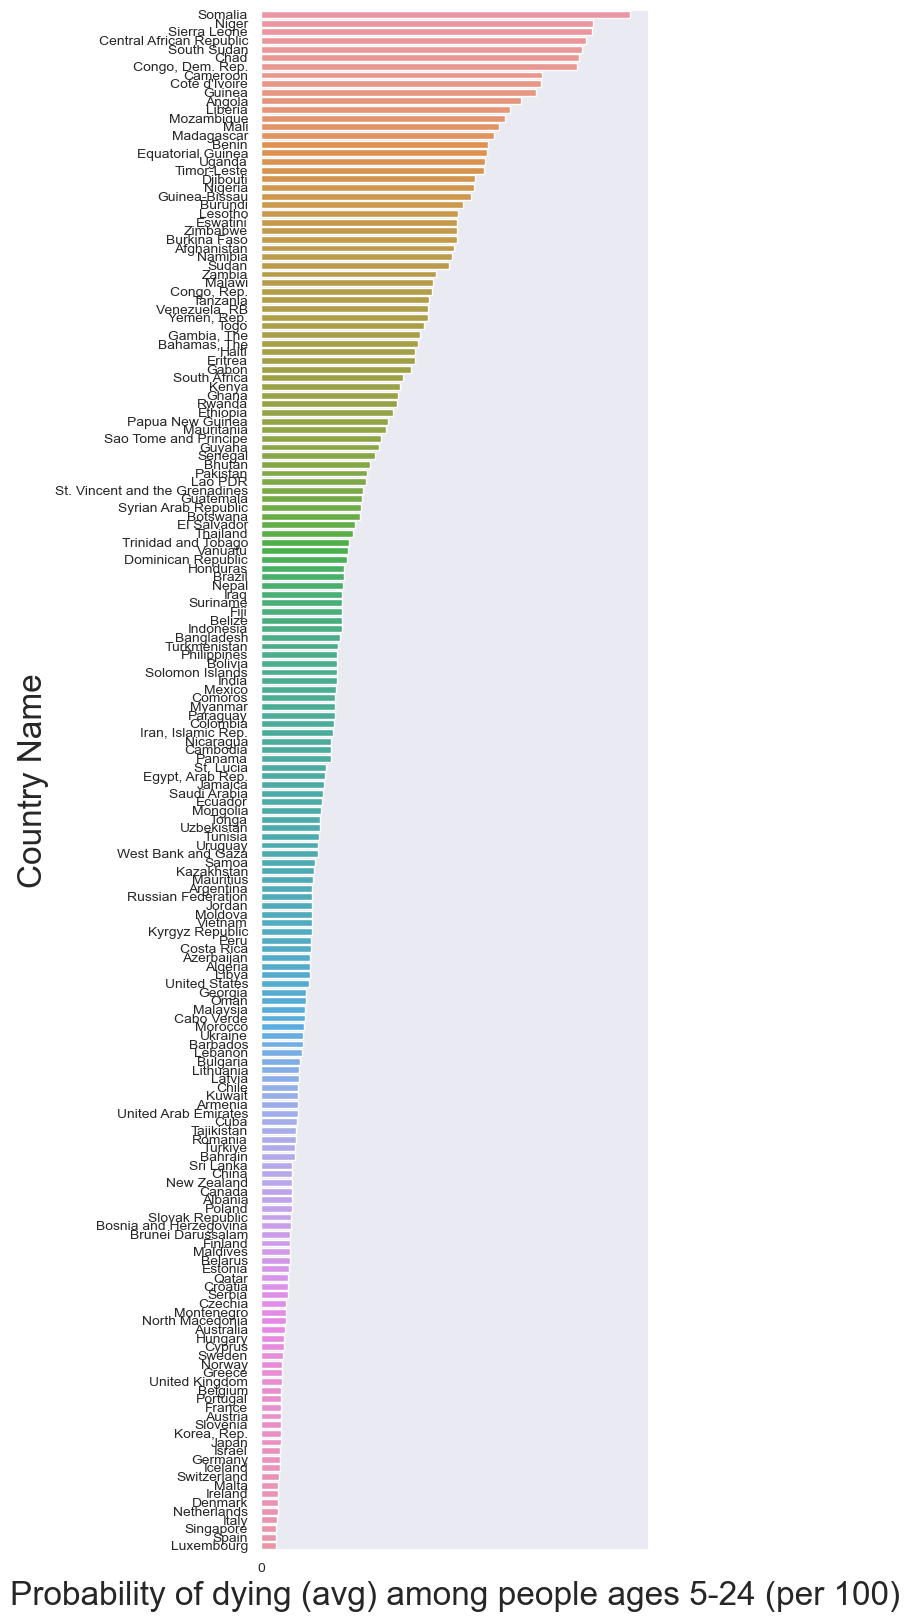

In [43]:
tee_tee_2 = tee.sort_values('Probability of dying (avg) among people ages 5-24 (per 100)',ascending=False)
plt.figure(figsize=(5,20))
plt.xticks(range(0,110,10), fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(x = 'Probability of dying (avg) among people ages 5-24 (per 100)', y = 'Country Name', data = tee_tee_2)

Countries with the lowest tertiary enrollment rates had the highest probability of dying. Countries with the higher tertiary enrollment rates (particularly within the high income bracket) had lower probability of dying.

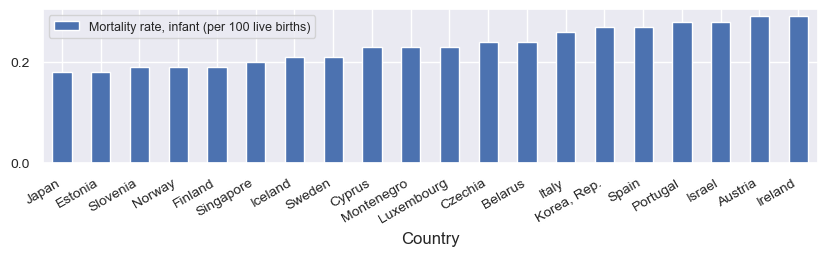

In [44]:
tee_tee_3 = tee.sort_values('Mortality rate, infant (per 100 live births)').head(20)
tee_tee_3.plot(y = 'Mortality rate, infant (per 100 live births)', \
               x = 'Country Name', kind="bar", figsize=(10,2))

plt.yticks(fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=12)
plt.legend(prop={'size':9}, loc='upper left')

With the exception of upper middle income Montenegro, countries classified as high income (income level with the top tertiary education enrollment rates) make up the ten lowest mortality rates. Additionally, countries in the Europe & Central Asia region, which recorded higher tertiary enrollment rates, also had eight out of the ten lowest mortality rates.

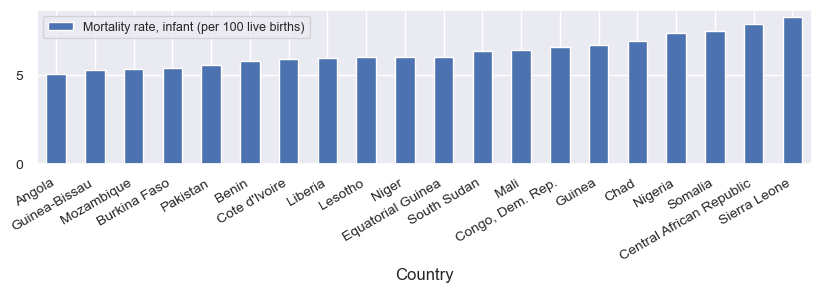

In [45]:
tee_tee_3 = tee.sort_values('Mortality rate, infant (per 100 live births)').tail(20)
tee_tee_3.plot(y = 'Mortality rate, infant (per 100 live births)', \
               x = 'Country Name', kind="bar", figsize=(10,2))

plt.yticks(fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=12)
plt.legend(prop={'size':9}, loc='upper left')

Countries all belonging to the Sub-Saharan Africa region, which recorded lower tertiary enrollment rates, also had higher mortality rates. With the exception of lower middle income Nigeria and Guinea, countries classified as low income (income level with the lowest tertiary enrollment ratees) make up the ten highest mortality rates.

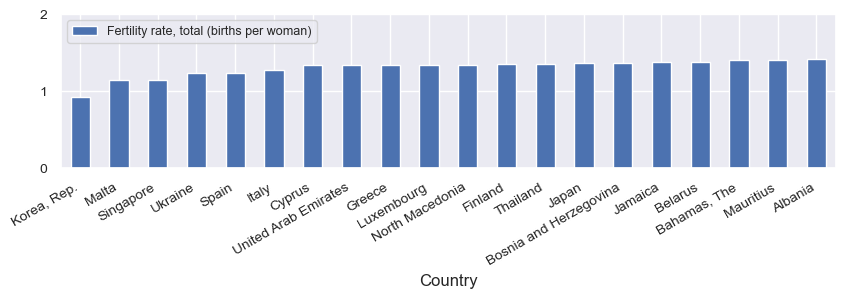

In [46]:
tee_tee_3 = tee.sort_values('Fertility rate, total (births per woman)').head(20)
tee_tee_3.plot(y = 'Fertility rate, total (births per woman)', \
               x = 'Country Name', kind="bar", figsize=(10,2))

plt.yticks(range(0,3,1), fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=12)
plt.legend(prop={'size':9}, loc='upper left')

With the exception of lower middle income Ukraine, countries classified as high income make up the ten lowest fertility rates. These ten countries belong to different regions, namely Europe & Central Asia, East Asia & Pacific, and Middle East & North Africa, which recorded varying tertiary enrollment rates, also had some of the lowest fertility rates.

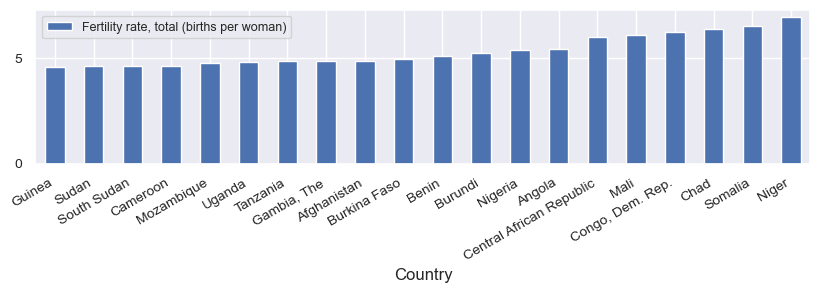

In [47]:
tee_tee_3 = tee.sort_values('Fertility rate, total (births per woman)').tail(20)
tee_tee_3.plot(y = 'Fertility rate, total (births per woman)', \
               x = 'Country Name', kind="bar", figsize=(10,2))

plt.yticks(fontsize=10)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=12)
plt.legend(prop={'size':9}, loc='upper left')

Countries all belonging to the Sub-Saharan Africa region, which recorded lower tertiary enrollment rates, also had higher fertility rates. With the exception of lower middle income Angola, Nigeria and Benin, countries classified as low income make up the ten highest fertility rates.

In [48]:
tee_4 = tee.copy()
tee_4.drop(columns=['Life expectancy at birth, total (years)', \
                    'Probability of dying (avg) among people ages 5-24 (per 100)', \
                    'Mortality rate, infant (per 100 live births)', \
                    'Fertility rate, total (births per woman)'], inplace=True)

In [49]:
tee_4.shape

(178, 19)

<function matplotlib.pyplot.show(close=None, block=None)>

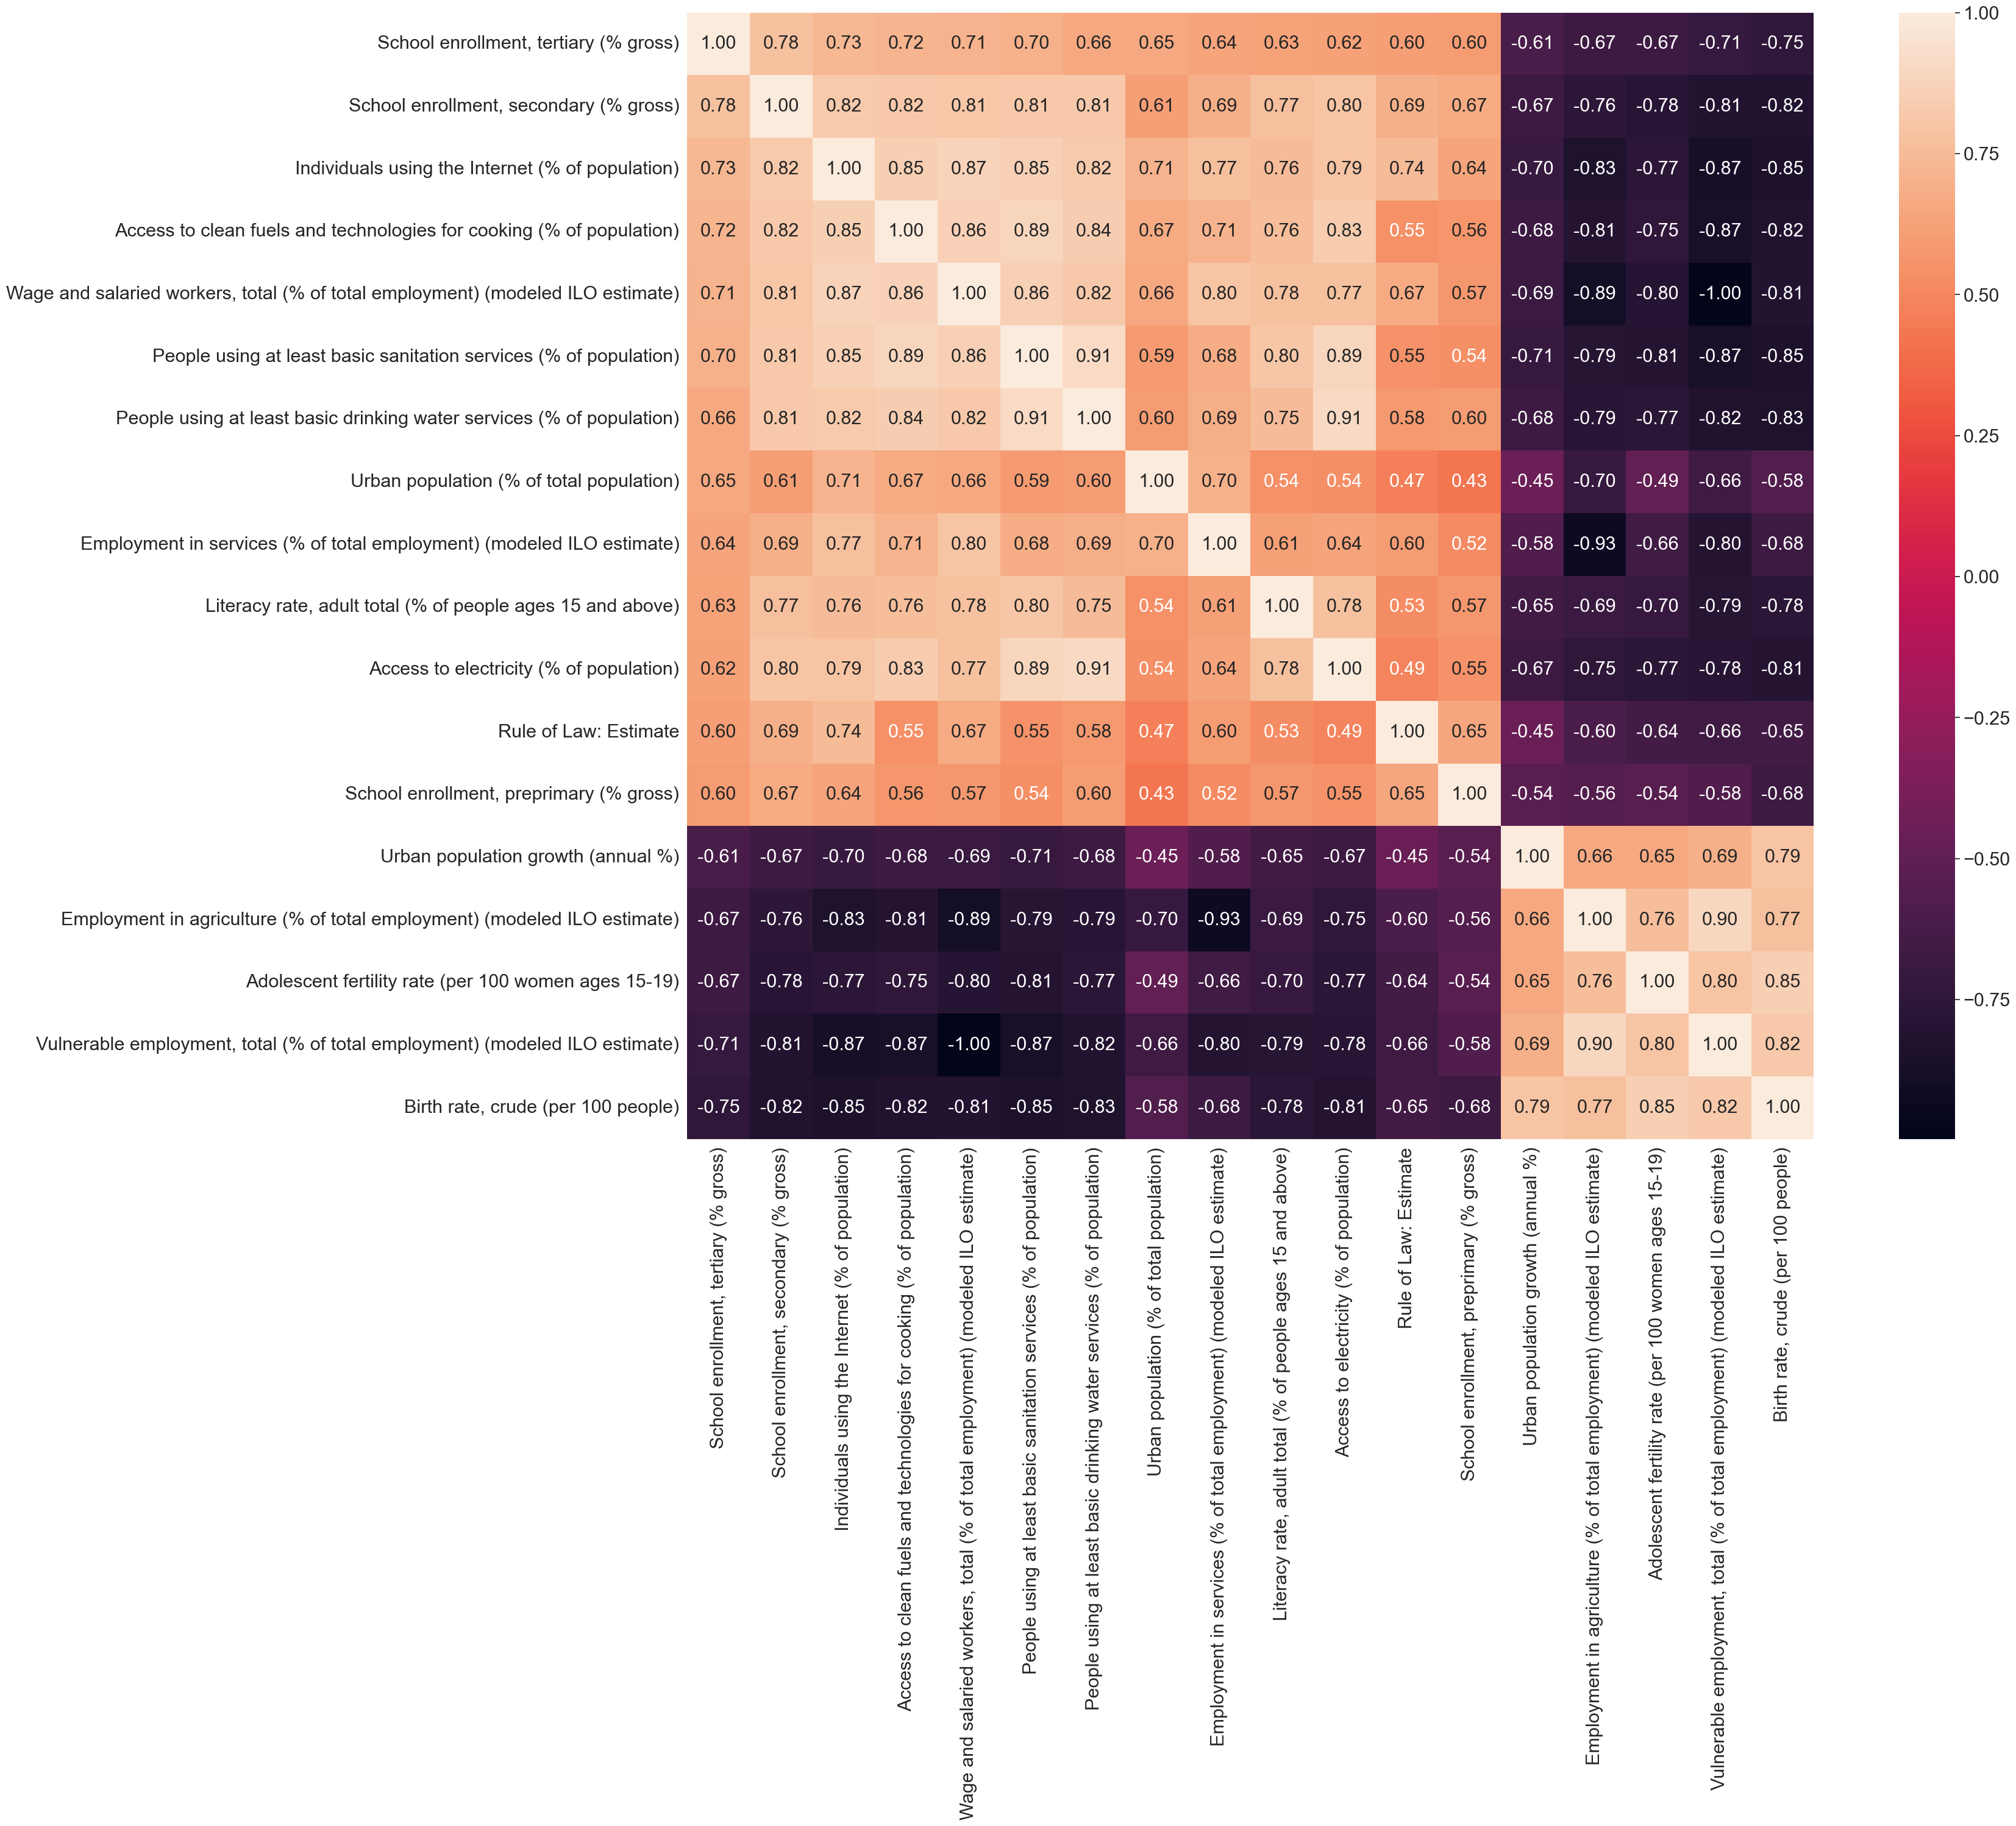

In [50]:
corrmat = tee_4.drop(columns=['Country Name']).corr()
k = 18
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(tee_4[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(36,24))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':22},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

### Machine Learning - regression

In [51]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Principal component regression

In [52]:
# Create a pipeline with PCA and linear regression,
# https://www.geeksforgeeks.org/principal-component-regression-pcr/

# using 9 principal components
pca = PCA(n_components=9)  
lin_reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('lin_reg', lin_reg)])

# define features
X = tee_4.drop(columns=['School enrollment, tertiary (% gross)','Country Name'], axis=1)
# define target
y = tee_4['School enrollment, tertiary (% gross)']

# fit the pipeline to the data
pipeline.fit(X, y)
  
# predict the labels for the data
y_pred = pipeline.predict(X)

In [53]:
# Evaluation metrics
r2 = pipeline.score(X, y)
print(f'R^2 Score: {r2:.2f}')

mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

R^2 Score: 0.67
Mean Absolute Error: 12.55
Mean Squared Error: 307.91
Root Mean Squared Error: 17.55


Looking at the evaluation metrics, they are not very promising, particularly MSE and RMSE. An R-squared score of 67% could be better. MAE tells us that the difference between actual and predicted target values is 12.55 on average. Notably, compared to the aggregate dataset, the individual countries dataset presented many more outliers, which MSE and RMSE are more sensitive to.

#### Random forest regressor

In [54]:
# define features
X = tee_4.drop(columns=['School enrollment, tertiary (% gross)','Country Name'], axis=1)
# define target
y = tee_4['School enrollment, tertiary (% gross)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=705)

In [55]:
print('Training set: ' + str(len(X_train)))
print('Test set: ' + str(len(X_test)))

Training set: 142
Test set: 36


In [56]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 705)
# fit random forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=705)

In [57]:
# calculate training accuracy
y_pred_train = rf_model.predict(X_train)
print(r2_score(y_train, y_pred_train))

# calculate test accuracy
y_pred_test = rf_model.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9404848042826697
0.7471776063458613


In [58]:
# print list of actual target values
print(y_train.to_numpy())
print(y_test.to_numpy())

[ 38.90494919  24.99110031  47.94522858  94.86453247   4.12
  21.12770081 148.5308838   14.22867012  60.39419174   7.01863003
  14.45331192   4.74        81.83975983  59.7784996   18.
  42.83069992  23.86655998  31.84726906  55.13629913 115.9520416
  57.67481995  67.93070221  12.67        91.08898926   6.23539019
  55.30754852  80.13816833  27.13        64.61711884  28.63998032
  23.61651039  52.44464874  12.5820303   14.02355003   7.31255007
   3.25        38.54533005  87.88871002   6.6         79.3
   5.14         3.09249997  22.14220047  11.62         4.22824001
  40.44564056  44.25410843  98.44618988  18.81594086  95.44790649
  29.9244194    1.3         11.14138031  16.92        31.26
  54.97652054  56.27151108   5.35        43.04687881   2.72
  25.45789909  12.56        75.17993927  16.16        67.7898407
   8.88        67.72174835   2.54        42.14403915  21.06587029
  10.19626045  14.26727009   7.09612989  73.37917328  68.35790253
  13.1359396   82.67        15.06         1.7

In [59]:
# print list of predicted target values
print(y_pred_train)
print(y_pred_test)

[ 36.45978546  24.85364132  45.36331206  85.88833369   3.896737
  29.60599852 122.89813462  27.65889149  53.4290699    6.324261
  13.93563921   5.81486299  85.21992187  65.53988609  38.13711119
  48.33392639  25.76297397  32.99408817  66.36504097 106.13203962
  56.37318077  62.47555542  14.99959596  89.83302536   5.41777313
  53.68494412  79.16086845  30.05756121  75.16021347  28.72613316
  23.4690794   60.56866299  41.35886765  21.54573724   4.116678
   4.31125197  35.14559326  86.00116672   6.73555101  63.89751278
   4.40495198   3.27372353  19.31441135  23.32535075   4.79372398
  55.70449409  50.60548515  94.01905289  23.4538229   85.92342186
  37.40672234   2.66753902   8.37049567  14.57808574  27.83322202
  51.6300848   49.15258093  12.022       37.01562024   4.50021999
  21.85974255  23.1612627   72.72730966  17.61159392  50.5456255
  10.99930406  62.60121422   7.93076603  50.20062675  25.07540608
  11.28324394  11.65339292   7.12407997  53.95482736  65.22368295
  11.49278375  79

In [60]:
mae_rf = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae_rf:.2f}')

mse_rf = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse_rf:.2f}')

rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error: {rmse_rf:.2f}')

Mean Absolute Error: 11.47
Mean Squared Error: 226.97
Root Mean Squared Error: 15.07


The Random Forest model performed well on the training set with a score of 94%. However, with a score of 74.7% on the test set, this model show signs of overfitting.

#### Linear regression

Coefficients:  [  0.08230827  -0.19390576   0.06295911 -10.63950152  -0.05467288
  -0.03810238  -0.14412447  -0.16040291  -0.44367419   0.28562127
   2.20903617   0.06244992   0.43622526   0.38237294  -0.38586566
   0.30190865   0.25671507]
Variance score (train): 0.70723909188439
Variance score (test): 0.6891037809097731


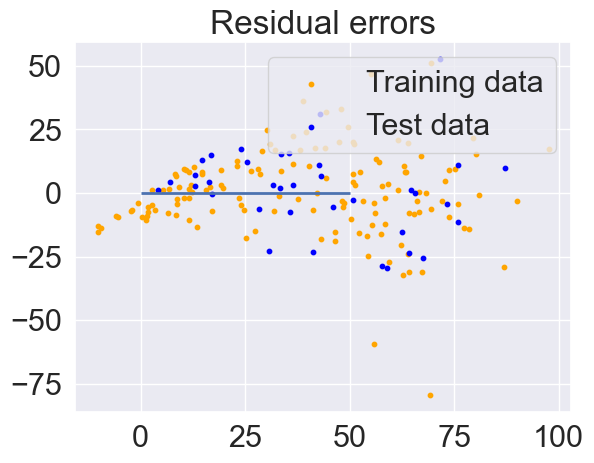

In [61]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
from sklearn import linear_model, metrics
 
# create linear regression object
lr_model = linear_model.LinearRegression()
# fit linear regression model
lr_model.fit(X_train, y_train)
 
# print regression coefficients and variance score
print('Coefficients: ', lr_model.coef_)
print('Variance score (train): {}'.format(lr_model.score(X_train, y_train)))
print('Variance score (test): {}'.format(lr_model.score(X_test, y_test)))
 
# plot residual errors
# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train, color="orange", s=10, label='Training data')
# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test, color="blue", s=10, label='Test data')
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
 
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()

In [62]:
predictions = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae_lr:.2f}')

mse_lr = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_lr:.2f}')

rmse_lr = np.sqrt(mse_lr)
print(f'Root Mean Squared Error: {rmse_lr:.2f}')

Mean Absolute Error: 12.42
Mean Squared Error: 279.10
Root Mean Squared Error: 16.71


This model scored near 70.7% on the training set and 68.9% on the test set. These scores are a lot closer together, but could be better. Its MAE, MSE and RMSE were a bit higher than that of PCR.

### KNN Regression

In [63]:
knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [64]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 0.70
Mean Squared Error: 281.61
Root Mean Squared Error: 16.78 

Test set:
R^2 score: 0.78
Mean Squared Error: 194.89
Root Mean Squared Error: 13.96


In [65]:
#find ideal k neighbors (optimize)
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10)})

In [66]:
gridsearch.best_params_

{'n_neighbors': 7}

Text(0.5, 1.0, 'ELBOW PLOT')

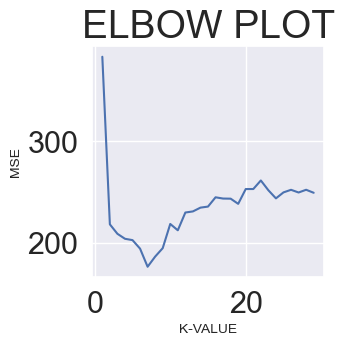

In [67]:
fig,ax=plt.subplots(figsize=(3,3))
k_list=np.arange(1,30,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=10)
ax.set_ylabel('MSE' ,fontsize=10)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [68]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [69]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mae_knn = mean_absolute_error(y_train, train_preds)
print(f'Mean Absolute Error: {mae_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.2f}')
mae_knn = mean_absolute_error(y_test, test_preds)
print(f'Mean Absolute Error: {mae_knn:.2f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 0.70
Mean Absolute Error: 11.27
Mean Squared Error: 282.81
Root Mean Squared Error: 16.82 

Test set:
R^2 score: 0.80
Mean Absolute Error: 9.41
Mean Squared Error: 176.60
Root Mean Squared Error: 13.29


KNN model performance at the ideal value, K = 4, increases test accuracy to 80%. ALthough it could be improved, KNN has performed better than the other models tested so far.

### Decision tree regression

In [70]:
# decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [71]:
dt = DecisionTreeRegressor(max_depth=3, random_state=705)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=705)

In [72]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.7935125498351165
0.6302422945066356


In [73]:
dt.get_depth()

3

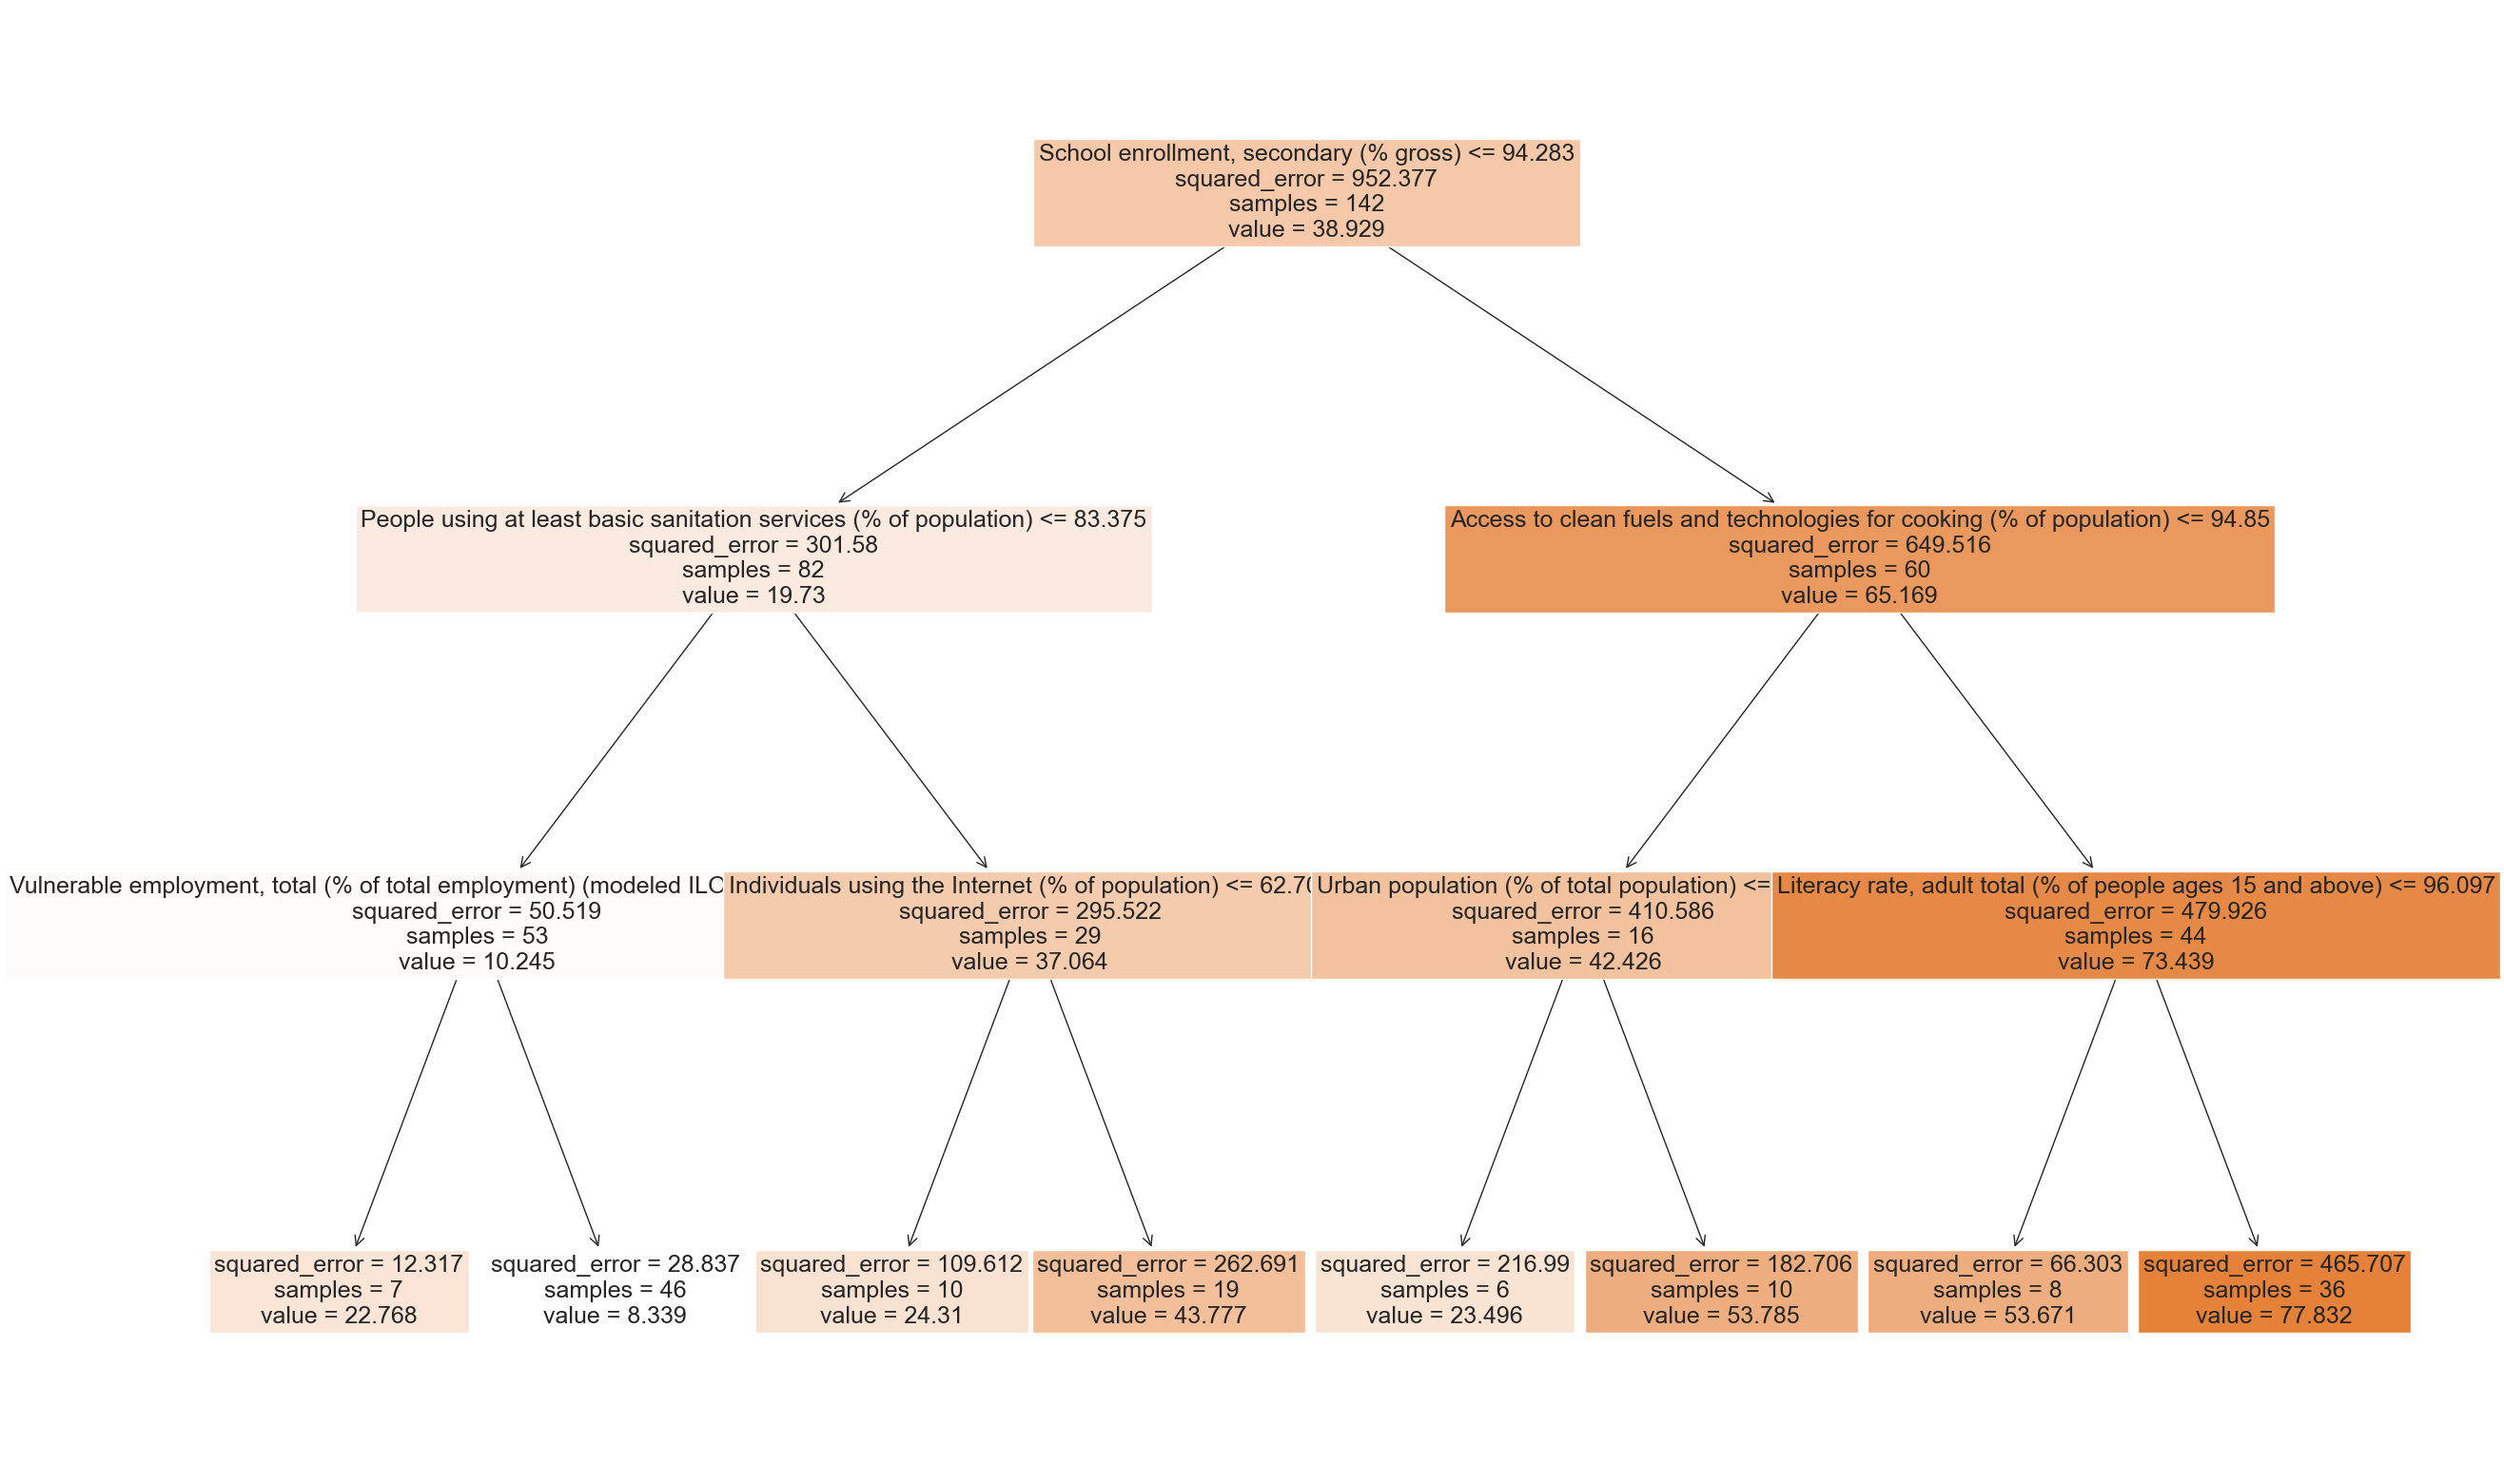

In [74]:
f = plt.figure(figsize=(30, 20))
_ = plot_tree(dt, fontsize=18, feature_names=X.columns, filled=True)

This model scored 79.4% on the training set and 63% on the test set, suggesting overfitting.

### Summary/Conclusions

This countries dataset started with 178 observations and 26 features. After briefly reviewing the dataset, that is, shape, columns, descriptive statistics, a correlation matrix was generated to view the relationships between features. Some feature engineering was attempted to reduce the number of features to work with, and scaling was done to align columns initially 'per 1000' to the majority 'per 100' columns.

Using tertiary education enrollment as the target variable, those features shown to be influenced by or dependent on the target were removed, reducing the dataset to 178 observations and 19 features. Principal Component Regression, Random Forest, Linear Regression, K-Nearest Neighbors (KNN) and Decision Tree were used to analyze the dataset. KNN showed the most promise, though all models could perform better.

The KNN model had training accuracy of 70% and test accuracy of 80%, with an ideal k value of 4. Mean absolute error was 9.41, while mean squared error and root mean squared error were 176.60 and 13.29, respectively.